## Results for Möstl et al. (2024) ICMECAT paper


script to produce paper results for the ICMECAT paper Möstl et al. 2024, ApJL

- uses environment helio5, see /envs/env_helio5.yml in the heliocats package

- uses ICMECAT version 2.2., release 2024 April 11, version 21 on figshare https://doi.org/10.6084/m9.figshare.6356420.v21

- additionally reads in Solar Orbiter and Parker Solar Probe data from data files, available in the figshare repository: https://doi.org/10.6084/m9.figshare.11973693.v25


TBD:

- power laws for solar min vs max
- power laws for each B component, check differences


#### papers to check:

decay index profiles for ARs, but only in AR, too close
https://iopscience.iop.org/article/10.3847/1538-4357/ac5b06

sunspot field strength at 1 solar radii
https://link.springer.com/article/10.1007/s11207-006-0265-4


- colors:

c0 = "xkcd:black"
c1 = "xkcd:magenta"
c2 = "xkcd:orange"
c3 = "xkcd:azure"



In [1]:
import pickle 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import datetime
import os
import scipy
import copy
import astropy.constants as const
from sunpy.time import parse_time


print(os.system('pwd'))

print(scipy.__version__) #for fitting algorithm


def powerlaw(x, a, b):
    return a*x**b

#one solar radius in au
rs=(const.R_sun/const.au).value
print(rs)

#scaling factor au to Rs
scale=1/rs
print(scale)


#path for in situ data
data_path='/Users/chris/python/data/insitu_python/'

/Users/chris/python/heliocats/scripts
0
1.10.0
0.004650467260962157
215.03215567054767


## load data

In [2]:
#load icmecat as pandas dataframe
file='../data/data_moestl_2024/HELIO4CAST_ICMECAT_v22_pandas.p'
[ic_pandas,h,p]=pickle.load( open(file, 'rb'))   

ic=ic_pandas

ic_mo_start_time_num=parse_time(ic.mo_start_time).plot_date

#get indices for each target
imes=np.where(ic.sc_insitu=='MESSENGER')[0]
ivex=np.where(ic.sc_insitu=='VEX')[0]
imav=np.where(ic.sc_insitu=='MAVEN')[0]
ijun=np.where(ic.sc_insitu=='Juno')[0]
istb=np.where(ic.sc_insitu=='STEREO-B')[0]
iuly=np.where(ic.sc_insitu=='ULYSSES')[0]

iwin=np.where(ic.sc_insitu=='Wind')[0]
ista=np.where(ic.sc_insitu=='STEREO-A')[0]
ipsp=np.where(ic.sc_insitu=='PSP')[0]
isol=np.where(ic.sc_insitu=='SolarOrbiter')[0]
ibep=np.where(ic.sc_insitu=='BepiColombo')[0]

## load PSP data
print('load PSP data RTN')
filepsp='psp_2018_now_rtn.p'
[psp,hpsp]=pickle.load(open(data_path+filepsp, "rb" ) ) 
print('done')

## load SolO data
print('load Solar Orbiter RTN')
filesolo='solo_2020_now_rtn.p'
[solo,hsolo]=pickle.load(open(data_path+filesolo, "rb" ) )    
print('done')


load PSP data RTN
done
load Solar Orbiter RTN
done


### Figure (1) Solar Orbiter example event April 2023

2023-04-10 02:00:00
2023-04-10 20:00:00
saved as  ../results/moestl_2024_icmecat/fig1_solo_example.pdf


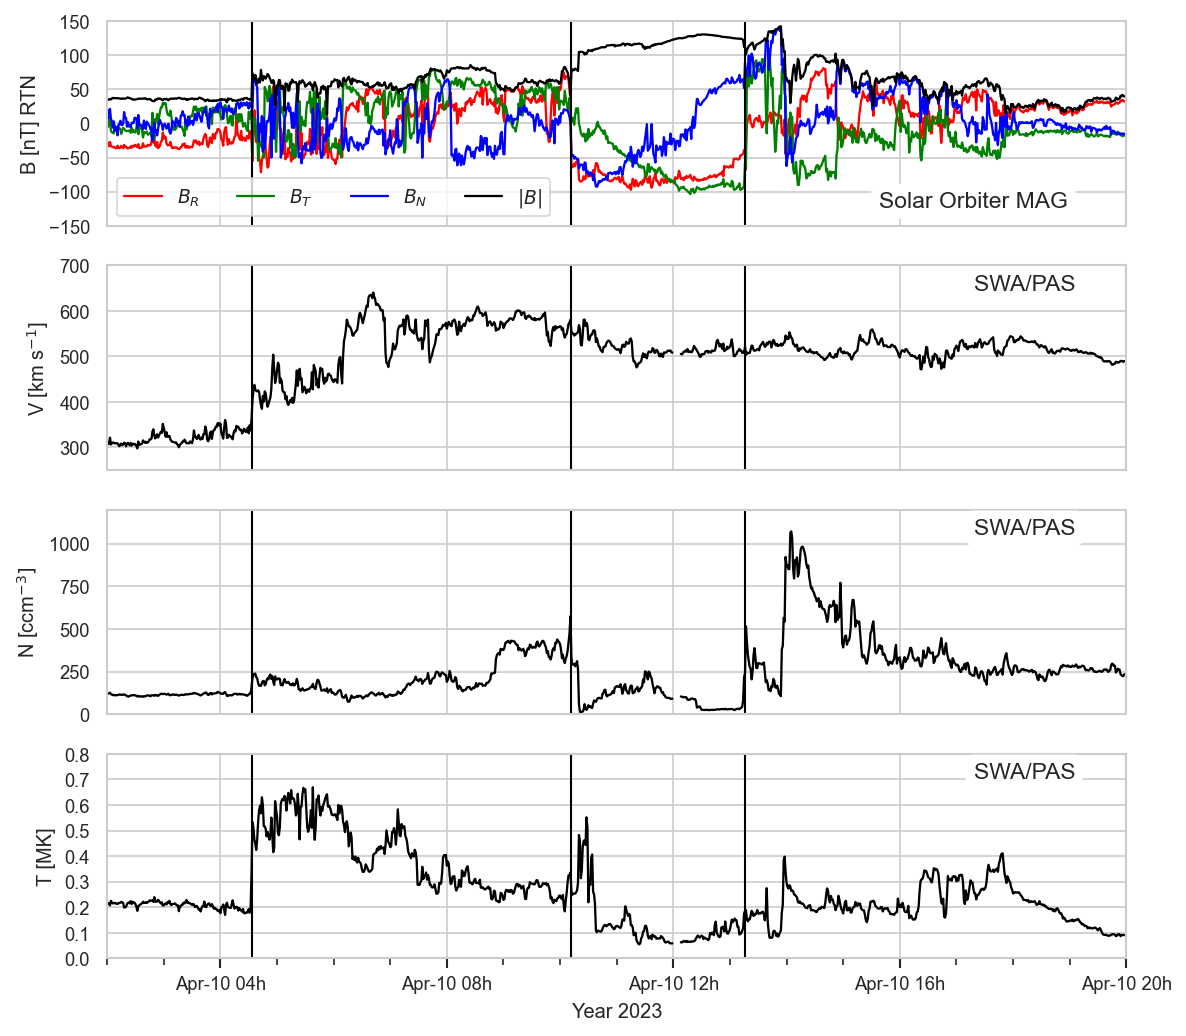

In [3]:
sns.set_style('whitegrid')
sns.set_context('paper')

fig=plt.figure(figsize=(8,7), dpi=150)

start=parse_time('2023-04-10 02:00').datetime
end=parse_time('2023-04-10 20:00').datetime

startind=np.where(start > solo.time)[0][-1]
endind=np.where(end > solo.time)[0][-1]

i=np.where(ic.icmecat_id=='ICME_SOLO_MOESTL_20230410_01')[0][0]

sc=solo[startind:endind]
print(start)
print(end)

lw=1.1

###################################

ax1 = plt.subplot(411) 

ax1.plot_date(sc.time,sc.bx,'-r',label='$B_{R}$',linewidth=lw)
ax1.plot_date(sc.time,sc.by,'-g',label='$B_{T}$',linewidth=lw)
ax1.plot_date(sc.time,sc.bz,'-b',label='$B_{N}$',linewidth=lw)
ax1.plot_date(sc.time,sc.bt,'-k',label='$|B|$',lw=lw)
    
######## plot vertical lines
ax1.plot_date([ic.icme_start_time[i],ic.icme_start_time[i]],[-500,500],'-k',linewidth=1)            
ax1.plot_date([ic.mo_start_time[i],ic.mo_start_time[i]],[-500,500],'-k',linewidth=1)            
ax1.plot_date([ic.mo_end_time[i],ic.mo_end_time[i]],[-500,500],'-k',linewidth=1)

plt.ylabel('B [nT] RTN')
plt.legend(loc=3,ncol=4,fontsize=9)
ax1.set_xlim(start,end)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b-%d') )
ax1.set_yticks(np.arange(-200,200,50))
ax1.set_ylim((-150, 150))

#ax1.set_xticklabels([]) does not work with sharex
#plt.setp(ax1.get_xticklabels(), fontsize=6)
plt.setp(ax1.get_xticklabels(), visible=False)

#########
ax2 = plt.subplot(412,sharex=ax1) 
ax2.plot_date(sc.time,sc.vt,'-k',label='V',linewidth=lw)

plt.ylabel('V [km s$^{-1}$]')
ax2.set_xlim(start,end)
ax2.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %H') )
ax2.set_yticks(np.arange(0,1000,100))
#ax2.tick_params(axis="y", labelsize=12)
plt.ylim((250, 700))

#ax2.set_xticklabels([])
plt.setp(ax2.get_xticklabels(), visible=False)

ax2.plot_date([ic.icme_start_time[i],ic.icme_start_time[i]],[0,3000],'-k',linewidth=1)            
ax2.plot_date([ic.mo_start_time[i],ic.mo_start_time[i]],[0,3000],'-k',linewidth=1)            
ax2.plot_date([ic.mo_end_time[i],ic.mo_end_time[i]],[0,3000],'-k',linewidth=1)     

#########
ax3 = plt.subplot(413,sharex=ax1) 
ax3.plot_date(sc.time,sc.np,'-k',label='Np',linewidth=lw)

plt.ylabel('N [ccm$^{-3}]$')
ax3.set_xlim(start,end)
ax3.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %H') )
plt.ylim((0, 1200))
#ax3.set_xticklabels([])
plt.setp(ax3.get_xticklabels(), visible=False)

#plot vertical lines
ax3.plot_date([ic.icme_start_time[i],ic.icme_start_time[i]],[0,10000],'-k',linewidth=1)
ax3.plot_date([ic.mo_start_time[i],  ic.mo_start_time[i]],  [0,10000],'-k',linewidth=1)
ax3.plot_date([ic.mo_end_time[i],ic.mo_end_time[i]],        [0,10000],'-k',linewidth=1)   


#############
ax4 = plt.subplot(414,sharex=ax1) 
ax4.plot_date(sc.time,sc.tp/1e6,'-k',label='Tp',linewidth=lw)

plt.ylabel('T [MK]')
ax4.set_xlim(start,end)
ax4.set_yticks(np.arange(0,1,0.1))
ax4.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %Hh') )
plt.ylim((0, 0.8))

#plot vertical lines
ax4.plot_date([ic.icme_start_time[i],ic.icme_start_time[i]],[0,100],'-k',linewidth=1)            
ax4.plot_date([ic.mo_start_time[i],ic.mo_start_time[i]],[0,100],'-k',linewidth=1)            
ax4.plot_date([ic.mo_end_time[i],ic.mo_end_time[i]],[0,100],'-k',linewidth=1)            


ax1.annotate('Solar Orbiter MAG',xy=(0.85,0.09),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white') )
ax2.annotate('SWA/PAS',xy=(0.9,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))
ax3.annotate('SWA/PAS',xy=(0.9,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))
ax4.annotate('SWA/PAS',xy=(0.9,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))

ax4.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax4.tick_params(which="both", bottom=True)
ax4.xaxis.set_major_locator(mdates.HourLocator(interval=4))


ax4.set_xlabel('Year 2023')

plt.tight_layout()
#plt.show()

plotfile='../results/moestl_2024_icmecat/fig1_solo_example.png'
plt.savefig(plotfile)
plotfile='../results/moestl_2024_icmecat/fig1_solo_example.pdf'
plt.savefig(plotfile)
print('saved as ',plotfile)

### Figure (2) PSP magnetic fields close-to-Sun observations

Event 1 min distance during ICME 0.2534 ICME_PSP_MOESTL_20181030_01
Event 2 min distance during ICME 0.0705 ICME_PSP_MOESTL_20220602_01
Event 3 min distance during ICME 0.0632 ICME_PSP_MOESTL_20220905_01
Event 4 min distance during ICME 0.0892 ICME_PSP_MOESTL_20210430_01
Event 5 min distance during ICME 0.2187 ICME_PSP_MOESTL_20230313_01
Event 6 min distance during ICME 0.2502 ICME_PSP_MOESTL_20230922_01
0.2532
saved as  ../results/moestl_2024_icmecat/fig2_psp_close.pdf


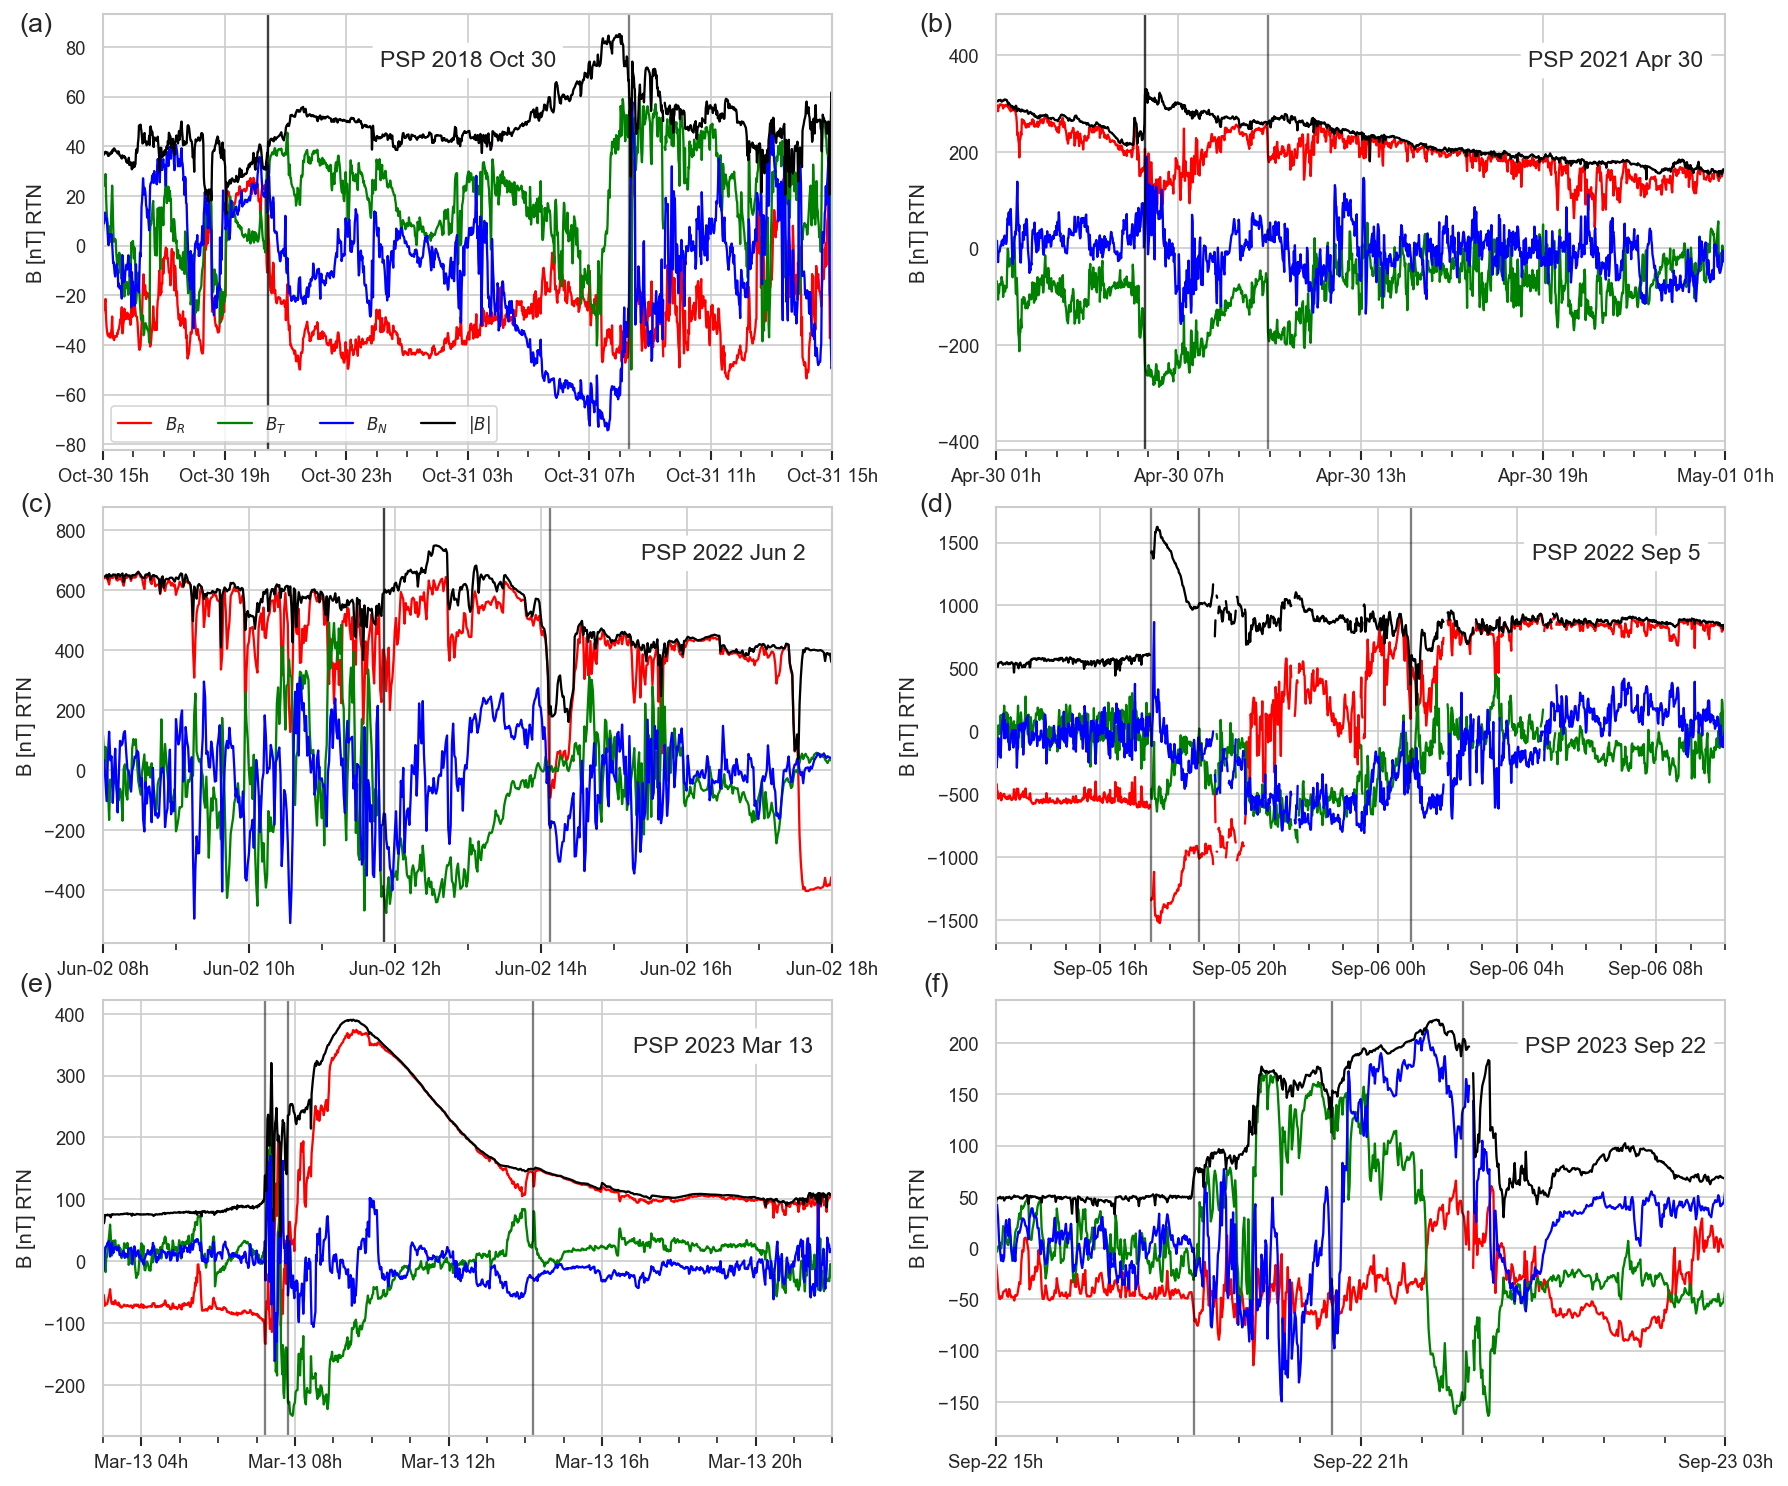

In [4]:
sns.set_style('whitegrid')
sns.set_context('paper')

fig=plt.figure(figsize=(12,10), dpi=150)



#extract PSP event data


i1=np.where(ic.icmecat_id=='ICME_PSP_MOESTL_20181030_01')[0][0]
starttime1=ic.icme_start_time[i1]
endtime1=ic.mo_end_time[i1]
startind1=np.where(starttime1 > psp.time)[0][-1]
endind1=np.where(endtime1 > psp.time)[0][-1]
sc1=psp[startind1-1000:endind1+1000]
print('Event 1 min distance during ICME',np.round(np.min(psp.r[startind1:endind1]),4), ic.icmecat_id[i1])



i2=np.where(ic.icmecat_id=='ICME_PSP_MOESTL_20220602_01')[0][0]
starttime2=ic.icme_start_time[i2]
endtime2=ic.mo_end_time[i2]
startind2=np.where(starttime2 > psp.time)[0][-1]
endind2=np.where(endtime2 > psp.time)[0][-1]
sc2=psp[startind2-1000:endind2+1000]
print('Event 2 min distance during ICME',np.round(np.min(psp.r[startind2:endind2]),4), ic.icmecat_id[i2])


i3=np.where(ic.icmecat_id=='ICME_PSP_MOESTL_20220905_01')[0][0]
starttime3=ic.icme_start_time[i3]
endtime3=ic.mo_end_time[i3]
startind3=np.where(starttime3 > psp.time)[0][-1]
endind3=np.where(endtime3 > psp.time)[0][-1]
sc3=psp[startind3-1500:endind3+1500]
print('Event 3 min distance during ICME',np.round(np.min(psp.r[startind3:endind3]),4),ic.icmecat_id[i3])


i4=np.where(ic.icmecat_id=='ICME_PSP_MOESTL_20210430_01')[0][0]
starttime4=ic.icme_start_time[i4]
endtime4=ic.mo_end_time[i4]
startind4=np.where(starttime4 > psp.time)[0][-1]
endind4=np.where(endtime4 > psp.time)[0][-1]
sc4=psp[startind4-1500:endind4+1500]
print('Event 4 min distance during ICME',np.round(np.min(psp.r[startind4:endind4]),4),ic.icmecat_id[i4])


i5=np.where(ic.icmecat_id=='ICME_PSP_MOESTL_20230313_01')[0][0]
starttime5=ic.icme_start_time[i5]
endtime5=ic.mo_end_time[i5]
startind5=np.where(starttime5 > psp.time)[0][-1]
endind5=np.where(endtime5 > psp.time)[0][-1]
sc5=psp[startind5-1500:endind5+1500]
print('Event 5 min distance during ICME',np.round(np.min(psp.r[startind5:endind5]),4),ic.icmecat_id[i5])

#i6=np.where(ic.icmecat_id=='ICME_PSP_MOESTL_20220912_01')[0][0]
i6=np.where(ic.icmecat_id=='ICME_PSP_MOESTL_20230922_01')[0][0]
starttime6=ic.icme_start_time[i6]
endtime6=ic.mo_end_time[i6]
startind6=np.where(starttime6 > psp.time)[0][-1]
endind6=np.where(endtime6 > psp.time)[0][-1]
sc6=psp[startind6-1500:endind6+1500]

min6=np.round(np.min(psp.r[startind6:endind6]),4)
print('Event 6 min distance during ICME',min6,ic.icmecat_id[i6])
print(ic.mo_sc_heliodistance[i6])

def plot_boundaries(ax,index):
    #plot vertical lines
    ax.axvline(ic.icme_start_time[index],color='black',linewidth=lw,alpha=al)
    ax.axvline(ic.mo_start_time[index],color='black',linewidth=lw,alpha=al)
    ax.axvline(ic.mo_end_time[index],color='black',linewidth=lw,alpha=al)


lw=1.1
al=0.5



#################################
ax1 = plt.subplot(321) 

ax1.plot_date(sc1.time,sc1.bx,'-r',label='$B_{R}$',linewidth=lw)
ax1.plot_date(sc1.time,sc1.by,'-g',label='$B_{T}$',linewidth=lw)
ax1.plot_date(sc1.time,sc1.bz,'-b',label='$B_{N}$',linewidth=lw)
ax1.plot_date(sc1.time,sc1.bt,'-k',label='$|B|$',lw=lw)
ax1.set_ylabel('B [nT] RTN')
ax1.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %Hh') )
ax1.annotate('PSP 2018 Oct 30',xy=(0.5,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))

plot_boundaries(ax1,i1)

ax1.set_xlim(datetime.datetime(2018,10,30,15),datetime.datetime(2018,10,31,15))
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=4))
ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax1.tick_params(which="both", bottom=True)


ax1.legend(loc=3,ncol=4,fontsize=8)


#################################
ax2 = plt.subplot(323) 
ax2.plot_date(sc2.time,sc2.bx,'-r',label='Bx',linewidth=lw)
ax2.plot_date(sc2.time,sc2.by,'-g',label='By',linewidth=lw)
ax2.plot_date(sc2.time,sc2.bz,'-b',label='Bz',linewidth=lw)
ax2.plot_date(sc2.time,sc2.bt,'-k',label='Btotal',lw=lw)
ax2.set_ylabel('B [nT] RTN')
ax2.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %Hh') )
ax2.annotate('PSP 2022 Jun 2',xy=(0.85,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))

plot_boundaries(ax2,i2)
ax2.set_xlim(datetime.datetime(2022,6,2,8),datetime.datetime(2022,6,2,18))
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax2.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax2.tick_params(which="both", bottom=True)



#################################
ax3 = plt.subplot(324) 

ax3.plot_date(sc3.time,sc3.bx,'-r',label='$B_{R}$',linewidth=lw)
ax3.plot_date(sc3.time,sc3.by,'-g',label='$B_{T}$',linewidth=lw)
ax3.plot_date(sc3.time,sc3.bz,'-b',label='$B_{N}$',linewidth=lw)
ax3.plot_date(sc3.time,sc3.bt,'-k',label='$|B|$',lw=lw)

ax3.set_ylabel('B [nT] RTN')
ax3.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %Hh') )
ax3.annotate('PSP 2022 Sep 5',xy=(0.85,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))

plot_boundaries(ax3,i3)
ax3.set_xlim(datetime.datetime(2022,9,5,13),datetime.datetime(2022,9,6,10))
ax3.xaxis.set_major_locator(mdates.HourLocator(interval=4))
ax3.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax3.tick_params(which="both", bottom=True)



#################################
ax4 = plt.subplot(322) 
ax4.plot_date(sc4.time,sc4.bx,'-r',label='Bx',linewidth=lw)
ax4.plot_date(sc4.time,sc4.by,'-g',label='By',linewidth=lw)
ax4.plot_date(sc4.time,sc4.bz,'-b',label='Bz',linewidth=lw)
ax4.plot_date(sc4.time,sc4.bt,'-k',label='Btotal',lw=lw)
ax4.set_ylabel('B [nT] RTN')
ax4.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %Hh') )
ax4.xaxis.set_major_locator(mdates.HourLocator(interval=6))

ax4.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax4.tick_params(which="both", bottom=True)

plot_boundaries(ax4,i4)

ax4.annotate('PSP 2021 Apr 30',xy=(0.85,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))
ax4.set_xlim(datetime.datetime(2021,4,30,1),datetime.datetime(2021,5,1,1))




#################################
ax5 = plt.subplot(325) 
ax5.plot_date(sc5.time,sc5.bx,'-r',label='Bx',linewidth=lw)
ax5.plot_date(sc5.time,sc5.by,'-g',label='By',linewidth=lw)
ax5.plot_date(sc5.time,sc5.bz,'-b',label='Bz',linewidth=lw)
ax5.plot_date(sc5.time,sc5.bt,'-k',label='Btotal',lw=lw)
ax5.set_ylabel('B [nT] RTN')
ax5.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %Hh') )
ax5.xaxis.set_major_locator(mdates.HourLocator(interval=4))

ax5.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax5.tick_params(which="both", bottom=True)

plot_boundaries(ax5,i5)

ax5.annotate('PSP 2023 Mar 13',xy=(0.85,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))
ax5.set_xlim(datetime.datetime(2023,3,13,3),datetime.datetime(2023,3,13,22))




#################################
ax6 = plt.subplot(326) 
ax6.plot_date(sc6.time,sc6.bx,'-r',label='Bx',linewidth=lw)
ax6.plot_date(sc6.time,sc6.by,'-g',label='By',linewidth=lw)
ax6.plot_date(sc6.time,sc6.bz,'-b',label='Bz',linewidth=lw)
ax6.plot_date(sc6.time,sc6.bt,'-k',label='Btotal',lw=lw)
ax6.set_ylabel('B [nT] RTN')
ax6.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d %Hh') )
ax6.xaxis.set_major_locator(mdates.HourLocator(interval=6))

ax6.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax6.tick_params(which="both", bottom=True)


plot_boundaries(ax6,i6)

ax6.annotate('PSP 2023 Sep 22',xy=(0.85,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))
#ax6.annotate('PSP 2023 Sep 22',xy=(0.85,0.88),xycoords='axes fraction',fontsize=11,ha='center',bbox=dict(boxstyle='round', facecolor='white'))
#'+str(min6)

ax6.set_xlim(datetime.datetime(2023,9,22,15),datetime.datetime(2023,9,23,3))



##################

plt.tight_layout()


plt.annotate('(a)',xy=(0.02,0.97),xycoords='figure fraction',fontsize=13,ha='center')
plt.annotate('(b)',xy=(0.52,0.97),xycoords='figure fraction',fontsize=13,ha='center')
plt.annotate('(c)',xy=(0.02,0.65),xycoords='figure fraction',fontsize=13,ha='center')
plt.annotate('(d)',xy=(0.52,0.65),xycoords='figure fraction',fontsize=13,ha='center')
plt.annotate('(e)',xy=(0.02,0.33),xycoords='figure fraction',fontsize=13,ha='center')
plt.annotate('(f)',xy=(0.52,0.33),xycoords='figure fraction',fontsize=13,ha='center')


plotfile='../results/moestl_2024_icmecat/fig2_psp_close.png'
plt.savefig(plotfile)

plotfile='../results/moestl_2024_icmecat/fig2_psp_close.pdf'
plt.savefig(plotfile)

print('saved as ',plotfile)

### Figure (3) for ICMECAT times and distance

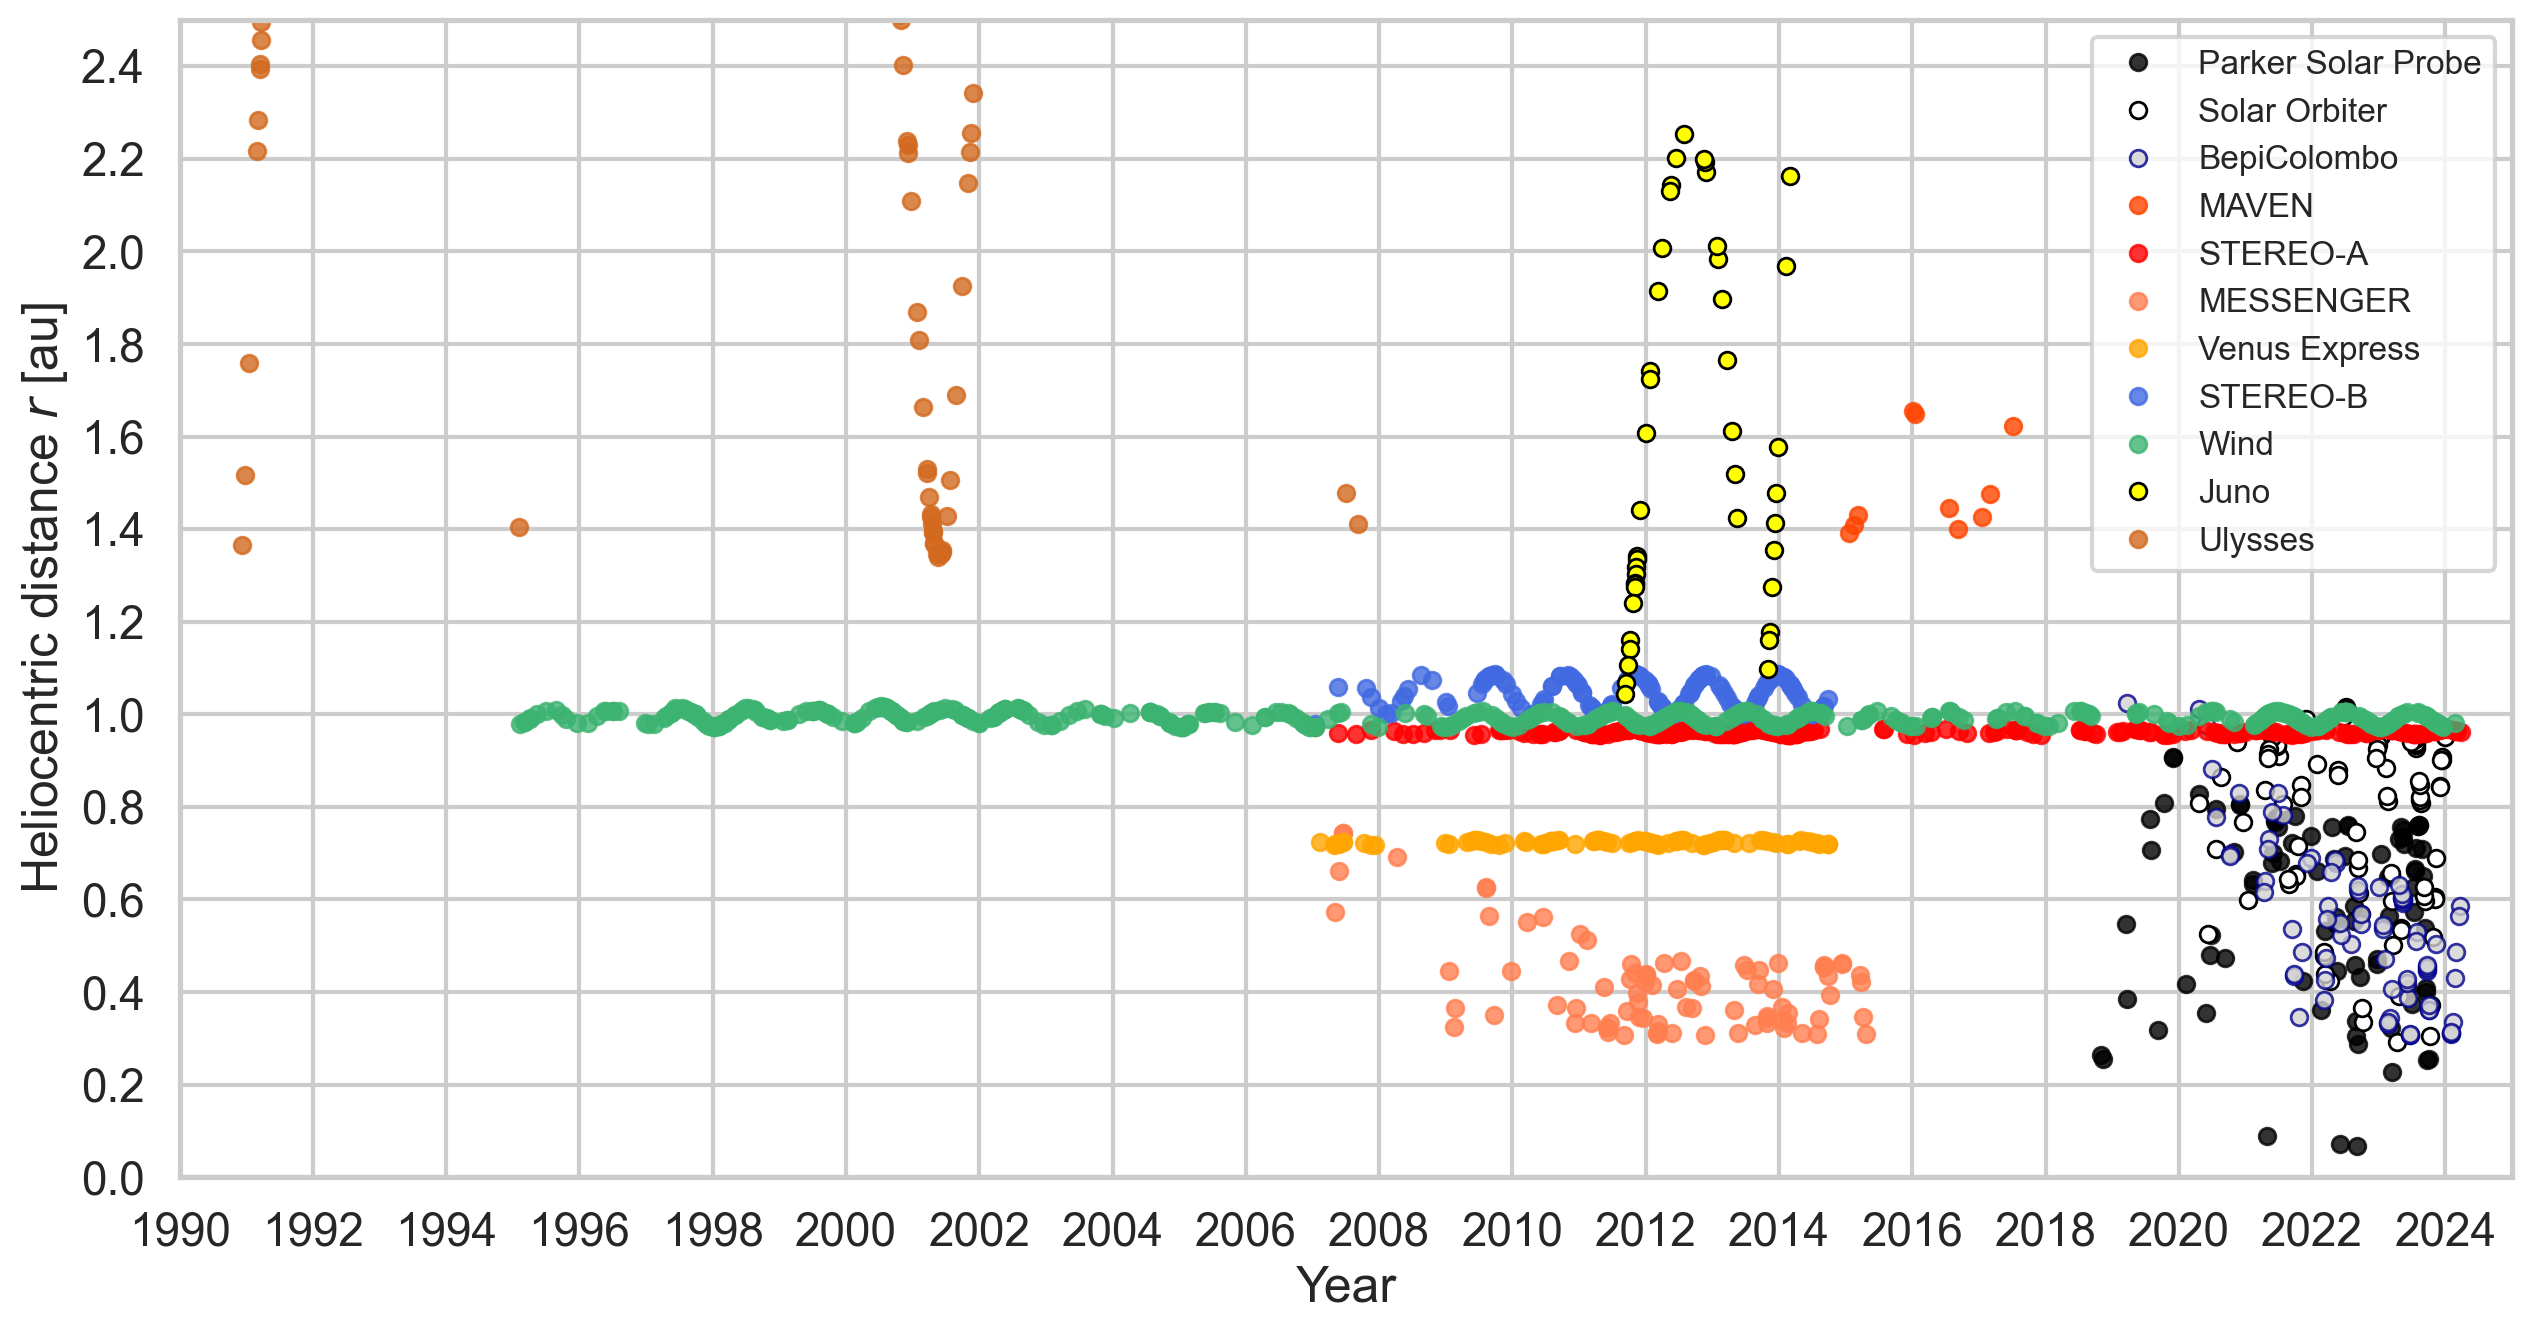

In [5]:
sns.set_context("talk")     
sns.set_style('whitegrid')

fig=plt.figure(3,figsize=(13,7),dpi=200)

ax1=plt.subplot(111)

ms=6
al=0.8


ax1.plot_date(ic_mo_start_time_num[ipsp],ic.mo_sc_heliodistance[ipsp],'o',c='black', alpha=al,ms=ms,label='Parker Solar Probe')
ax1.plot_date(ic_mo_start_time_num[isol],ic.mo_sc_heliodistance[isol],'o',c='black',markerfacecolor='white', alpha=1.0,ms=ms,label='Solar Orbiter')
ax1.plot_date(ic_mo_start_time_num[ibep],ic.mo_sc_heliodistance[ibep],'o',c='darkblue',markerfacecolor='lightgrey', alpha=al,ms=ms,label='BepiColombo')
ax1.plot_date(ic_mo_start_time_num[imav],ic.mo_sc_heliodistance[imav],'o',c='orangered', alpha=al,ms=ms,label='MAVEN')
ax1.plot_date(ic_mo_start_time_num[ista],ic.mo_sc_heliodistance[ista],'o',c='red', alpha=al,ms=ms, label='STEREO-A')

ax1.plot_date(ic_mo_start_time_num[imes],ic.mo_sc_heliodistance[imes],'o',c='coral', alpha=al,ms=ms,label='MESSENGER')
ax1.plot_date(ic_mo_start_time_num[ivex],ic.mo_sc_heliodistance[ivex],'o',c='orange', alpha=al,ms=ms,label='Venus Express')
ax1.plot_date(ic_mo_start_time_num[istb],ic.mo_sc_heliodistance[istb],'o',c='royalblue', alpha=al,ms=ms,label='STEREO-B')
ax1.plot_date(ic_mo_start_time_num[iwin],ic.mo_sc_heliodistance[iwin],'o',c='mediumseagreen', alpha=al,ms=ms,label='Wind')
ax1.plot_date(ic_mo_start_time_num[ijun],ic.mo_sc_heliodistance[ijun],'o',c='black',markerfacecolor='yellow', alpha=1,ms=ms,label='Juno')
ax1.plot_date(ic_mo_start_time_num[iuly],ic.mo_sc_heliodistance[iuly],'o',c='chocolate', alpha=al,ms=ms,label='Ulysses')


ax1.set_ylabel('Heliocentric distance $r$ [au]')
ax1.set_xlabel('Year')
ax1.set_ylim([0,1.7])

years = mdates.YearLocator(2)   
ax1.xaxis.set_major_locator(years)
myformat = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(myformat)

#ax1.tick_params(axis="x", labelsize=12)
#ax1.tick_params(axis="y", labelsize=12)

ax1.set_xlim([datetime.datetime(1990,1,1),datetime.datetime(2025,1,1)])


ax1.legend(loc=1,fontsize=12)

ax1.set_yticks(np.arange(0,4,0.2))
ax1.set_ylim([0,2.5])

plt.tight_layout()
plt.savefig('../results/moestl_2024_icmecat/fig3_icmecat_obs.png', dpi=150,bbox_inches='tight')
plt.savefig('../results/moestl_2024_icmecat/fig3_icmecat_obs.pdf', dpi=150,bbox_inches='tight')


### B(r) curve fits in magnetic obstacle

B(r) for MO_Bmean
start fit at 1 solar radii, in AU:  0.0047

LM; TRF; dogbox methods
[10.35103699 -1.58407919]
[10.35103873 -1.58407911]
[10.35102729 -1.58407966]
LM results in detail
Parameters a and b, y = a x^b: [10.35 -1.58]
3 standard deviation on a and b [0.6  0.03]




-----------------------------
B(r) for MO_Bmax
LM; TRF; dogbox methods
[14.7268952  -1.53885636]
[14.72689431 -1.53885639]
[14.72689499 -1.53885637]
LM results in detail
Parameters a and b, y = a x^b: [14.73 -1.54]
3 standard deviation on a and b [0.96 0.03]




---------------------
component fits
LM results in detail
Parameters a and b, y = a x^b: [ 2.96 -1.62]
3 standard deviation on a and b [0.57 0.09]


LM results in detail
Parameters a and b, y = a x^b: [ 4.26 -1.63]
3 standard deviation on a and b [0.39 0.03]




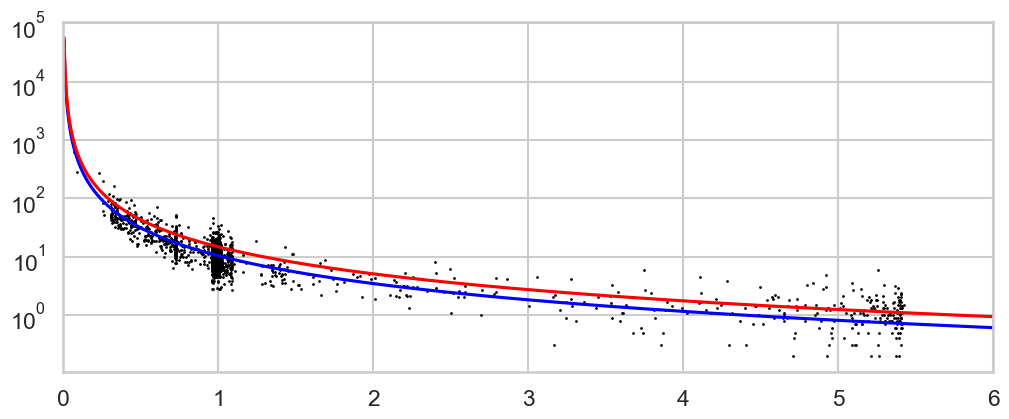

In [6]:
print('B(r) for MO_Bmean')

r=ic.mo_sc_heliodistance
b=ic.mo_bmean

#remove events where one or both are nan
rem=np.where(np.logical_or(np.isnan(r), np.isnan(b)))[0]

r=r.drop(rem)
b=b.drop(rem)


rs=1*const.R_sun/const.au
print('start fit at 1 solar radii, in AU: ',np.round(rs,4))
print()
fitx=np.linspace(rs,6,num=10000)


#curve fit, no initial guess, all methods arrive at similar values

#Algorithm to perform minimization.
#‘trf’ : Trust Region Reflective algorithm, particularly suitable for large sparse problems with bounds. Generally robust method.
#‘dogbox’ : dogleg algorithm with rectangular trust regions, typical use case is small problems with bounds. Not recommended for problems with rank-deficient Jacobian.
#‘lm’ : Levenberg-Marquardt algorithm as implemented in MINPACK. Doesn’t handle bounds and sparse Jacobians. Usually the most efficient method for small unconstrained problems.
fit_lm=scipy.optimize.curve_fit(powerlaw, r,b,method='lm',full_output=True)
fit_trf=scipy.optimize.curve_fit(powerlaw, r,b,method='trf')
fit_dogbox=scipy.optimize.curve_fit(powerlaw, r,b,method='dogbox')

print('LM; TRF; dogbox methods')
print(fit_trf[0])
print(fit_lm[0])
print(fit_dogbox[0])


#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# discussion of variance for MO Bmean
param=fit_lm[0]
pcov=fit_lm[1]
perr = np.sqrt(np.diag(pcov))
print('LM results in detail')
print('Parameters a and b, y = a x^b:',np.round(param,2))
print('3 standard deviation on a and b', 3*np.round(perr,2))
print()
print()


#---------------------------------------------------------------


fig=plt.figure(3,figsize=(12,10),dpi=100)
ax=plt.subplot(211)
ax.plot(r,b,'ok', markersize=1)
ax.set_yscale('log')
ax.set_xlim(0,6)
ax.plot(fitx,powerlaw(fitx,param[0],param[1]),'-b')

#LM results
print()
print()



print('-----------------------------')

###########################################################################
print('B(r) for MO_Bmax')

r=ic.mo_sc_heliodistance
b=ic.mo_bmax

#remove events where one or both are nan
rem=np.where(np.logical_or(np.isnan(r), np.isnan(b)))[0]

r=r.drop(rem)
b=b.drop(rem)

fit2_lm=scipy.optimize.curve_fit(powerlaw, r,b,method='lm',full_output=True)
fit2_trf=scipy.optimize.curve_fit(powerlaw, r,b,method='trf')
fit2_dogbox=scipy.optimize.curve_fit(powerlaw, r,b,method='dogbox')


print('LM; TRF; dogbox methods')
print(fit2_trf[0])
print(fit2_lm[0])
print(fit2_dogbox[0])

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# discussion of variance for MO Bmax
param2=fit2_lm[0]
pcov2=fit2_lm[1]
perr2 = np.sqrt(np.diag(pcov2))
print('LM results in detail')
print('Parameters a and b, y = a x^b:',np.round(param2,2))
print('3 standard deviation on a and b', 3*np.round(perr2,2))
print()
print()


#---------------------------------------------------------------

#ax2=plt.subplot(212)
#ax2.plot(r,b,'ok', markersize=1)
#ax2.set_yscale('log')
#ax2.set_xlim(0,3)

ax.plot(fitx,powerlaw(fitx,param2[0],param2[1]),'-r')


#LM results
print()
print()


#all results , e.g. nfev indicates the number of function calls
#print(fit2_lm)



print('---------------------')

print('component fits')

r=ic.mo_sc_heliodistance
bz=ic.mo_bzmean

rem=np.where(np.logical_or(np.isnan(r), np.isnan(bz)))[0]
r=r.drop(rem)
bz=bz.drop(rem)

fitbz_lm=scipy.optimize.curve_fit(powerlaw, r,np.abs(bz),method='lm',full_output=True)

parambz=fitbz_lm[0]
pcovbz=fitbz_lm[1]
perrbz = np.sqrt(np.diag(pcovbz))
print('LM results in detail')
print('Parameters a and b, y = a x^b:',np.round(parambz,2))
print('3 standard deviation on a and b', 3*np.round(perrbz,2))
print()
print()


##remove events where one or both are nan


r=ic.mo_sc_heliodistance
by=ic.mo_bymean

rem=np.where(np.logical_or(np.isnan(r), np.isnan(by)))[0]
r=r.drop(rem)
by=by.drop(rem)

fitby_lm=scipy.optimize.curve_fit(powerlaw, r,np.abs(by),method='lm',full_output=True)

paramby=fitby_lm[0]
pcovby=fitby_lm[1]
perrby = np.sqrt(np.diag(pcovby))
print('LM results in detail')
print('Parameters a and b, y = a x^b:',np.round(paramby,2))
print('3 standard deviation on a and b', 3*np.round(perrby,2))
print()
print()


### Figure (4) B(r) power laws

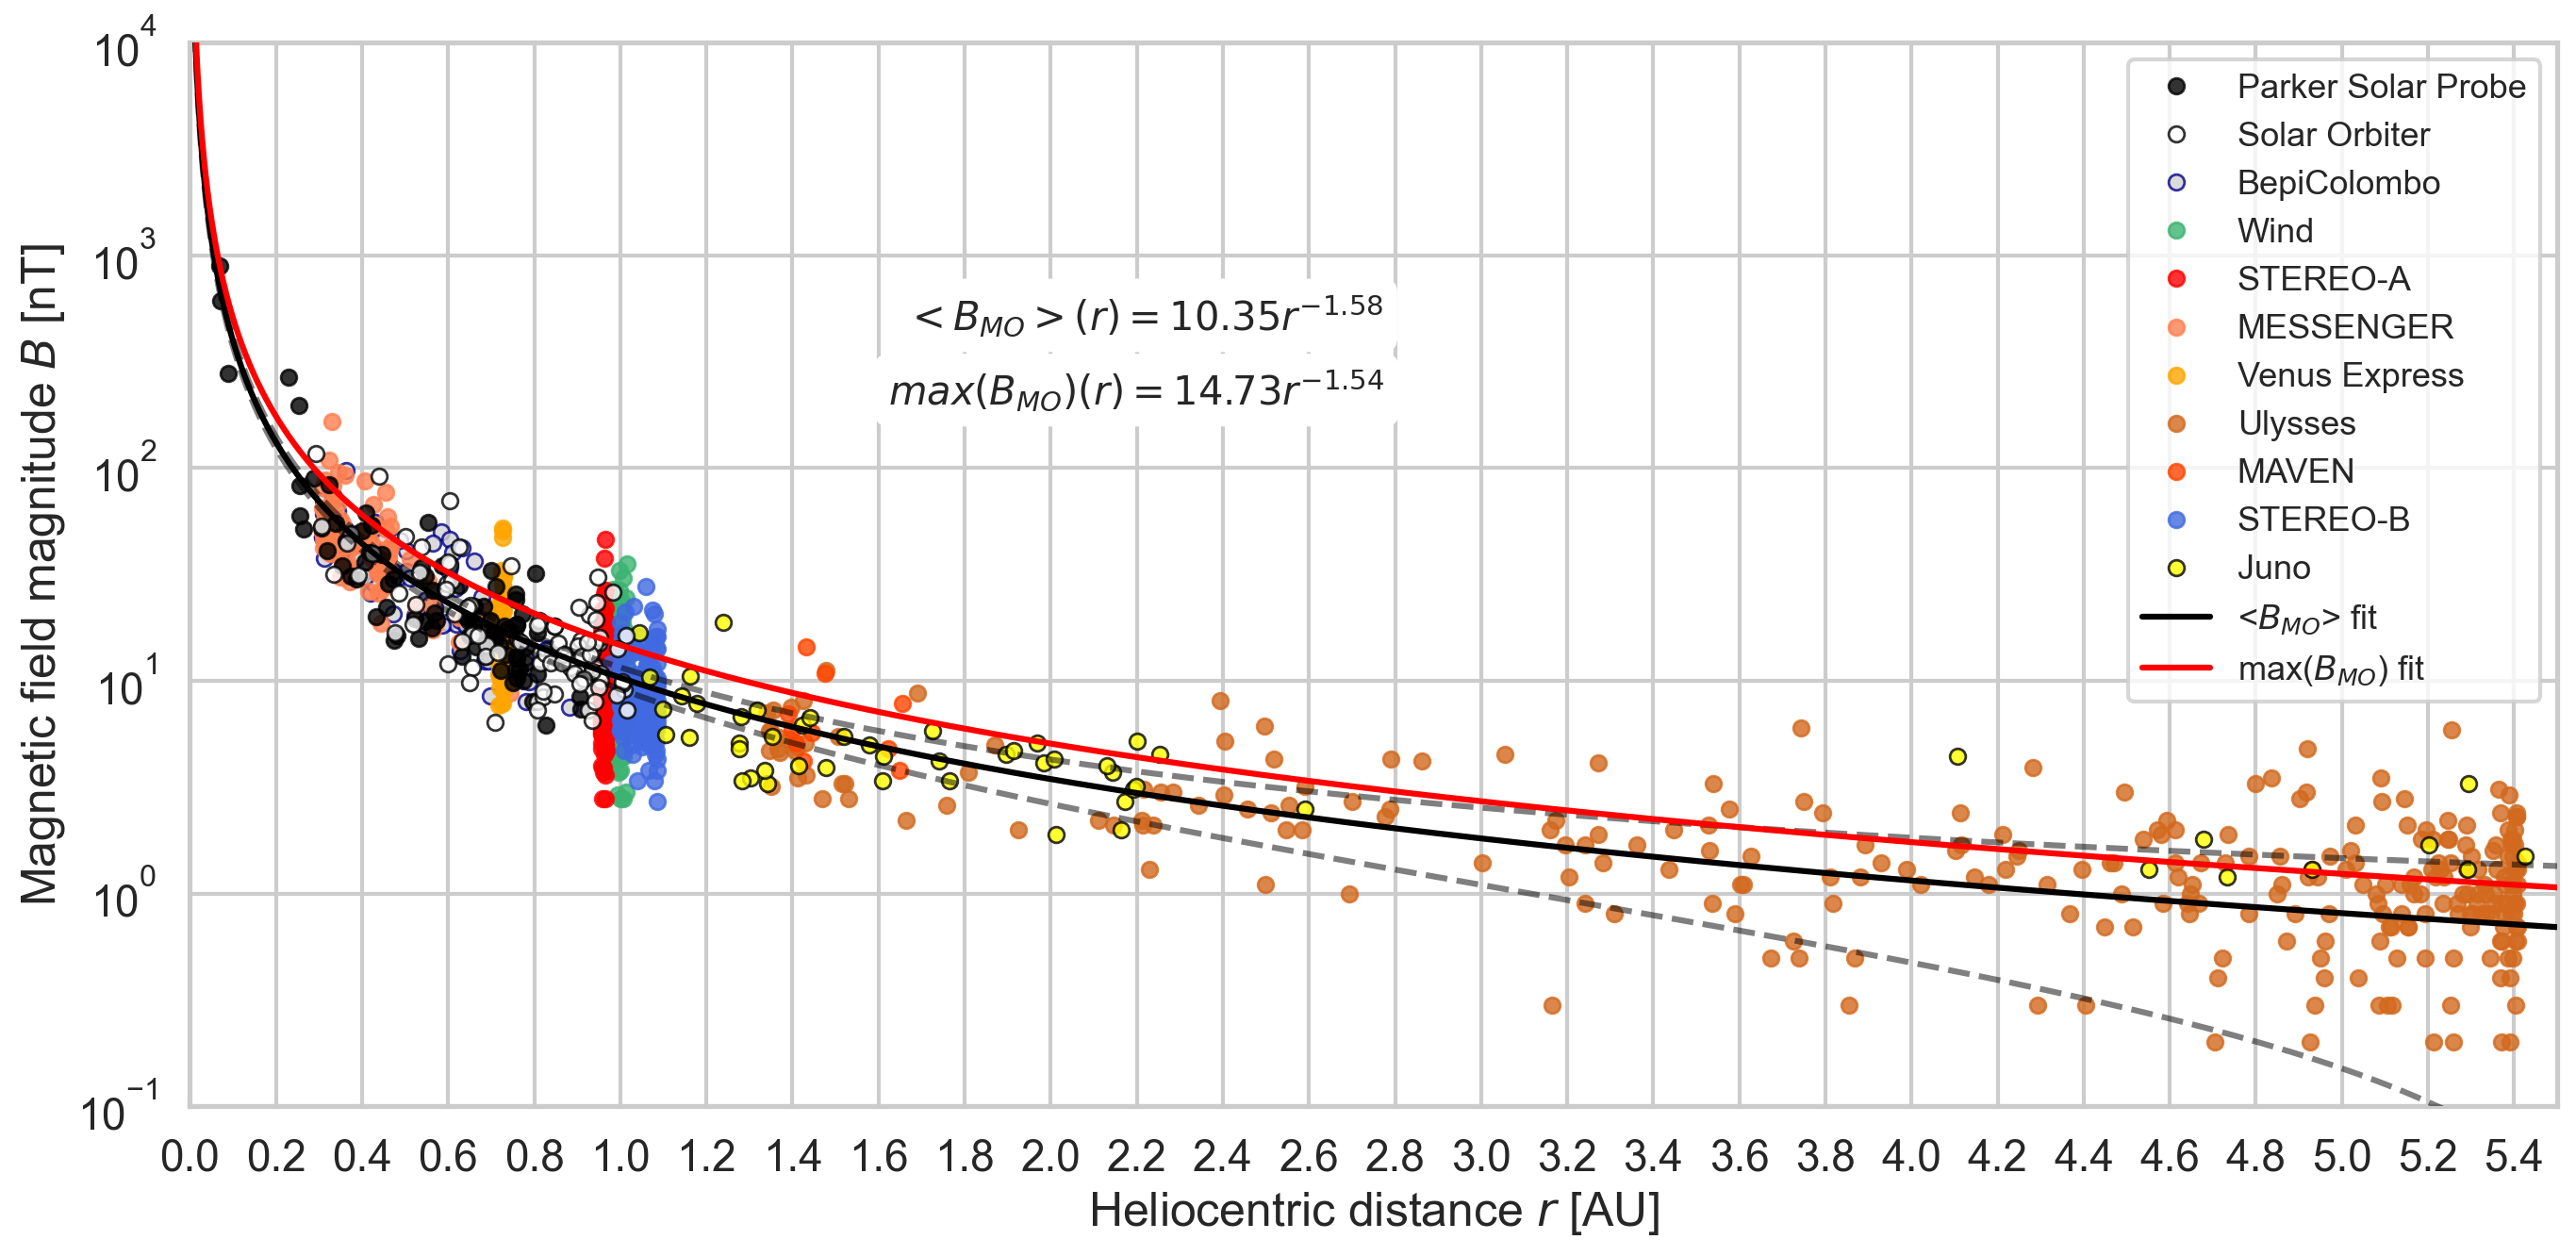

In [7]:
sns.set_context("talk")     
sns.set_style('whitegrid')

###############################################################################
fig=plt.figure(3,figsize=(14,7),dpi=200)

##############################################################################
ax=plt.subplot(111)
#plt.title('ICMECAT mean magnetic field in the magnetic obstacle')
ax.set_xlabel('Heliocentric distance $r$ [AU]')
ax.set_ylabel('Magnetic field magnitude $B$ [nT]')

ax.plot(ic.mo_sc_heliodistance[ipsp],ic.mo_bmean[ipsp],'o',c='black', alpha=al,ms=ms, label='Parker Solar Probe',zorder=3)
ax.plot(ic.mo_sc_heliodistance[isol],ic.mo_bmean[isol],'o',c='black', markerfacecolor='white',alpha=al,ms=ms, label='Solar Orbiter',zorder=3)
ax.plot(ic.mo_sc_heliodistance[ibep],ic.mo_bmean[ibep],'o',c='darkblue',markerfacecolor='lightgrey', alpha=al,ms=ms,label='BepiColombo')
ax.plot(ic.mo_sc_heliodistance[iwin],ic.mo_bmean[iwin],'o',c='mediumseagreen', alpha=al,ms=ms,label='Wind')
ax.plot(ic.mo_sc_heliodistance[ista],ic.mo_bmean[ista],'o',c='red', alpha=al,ms=ms, label='STEREO-A')

ax.plot(ic.mo_sc_heliodistance[imes],ic.mo_bmean[imes],'o',c='coral', alpha=al,ms=ms,label='MESSENGER')
ax.plot(ic.mo_sc_heliodistance[ivex],ic.mo_bmean[ivex],'o',c='orange', alpha=al,ms=ms,label='Venus Express')
ax.plot(ic.mo_sc_heliodistance[iuly],ic.mo_bmean[iuly],'o',c='chocolate', alpha=al,ms=ms, label='Ulysses')
ax.plot(ic.mo_sc_heliodistance[imav],ic.mo_bmean[imav],'o',c='orangered', alpha=al,ms=ms, label='MAVEN')
ax.plot(ic.mo_sc_heliodistance[istb],ic.mo_bmean[istb],'o',c='royalblue', alpha=al,ms=ms, label='STEREO-B')
ax.plot(ic.mo_sc_heliodistance[ijun],ic.mo_bmean[ijun],'o', c='black',markerfacecolor='yellow', alpha=al,ms=ms, label='Juno')

au_axis=np.arange(0,5.5,0.2)
ax.set_xticks(au_axis)
#ax3.tick_params(axis="x", labelsize=12)
ax.set_xlim([0,5.5])

ax.set_ylim([1e-1,1*1e4])
ax.set_yscale('log')

########### plot fits
ax.plot(fitx,powerlaw(fitx,param[0],param[1]),'-k', zorder=5, label='<$B_{MO}$> fit')
#with errors 3 std
ax.plot(fitx,powerlaw(fitx,param[0]-3*perr[0],fit_lm[0][1])-3*perr[0],'--k',alpha=0.5, zorder=5)
ax.plot(fitx,powerlaw(fitx,param[0]+3*perr[0],fit_lm[0][1])+3*perr[0],'--k',alpha=0.5, zorder=5)

ax.plot(fitx,powerlaw(fitx,param2[0],param2[1]),'-r', zorder=5, label='max($B_{MO}$) fit')

formulastring='$<B_{MO}>(r)='+str(np.round(param[0],2))+'  r^{'+str(np.round(param[1],2))+'}$'
ax.annotate(formulastring,xy=(0.403,0.73),xycoords='axes fraction',fontsize=15,ha='center',bbox=dict(boxstyle='round', facecolor='white'))

formulastring='$max(B_{MO})(r)='+str(np.round(param2[0],2))+' r^{'+str(np.round(param2[1],2))+'}$'
ax.annotate(formulastring,xy=(0.4,0.66),xycoords='axes fraction',fontsize=15,ha='center',bbox=dict(boxstyle='round', facecolor='white'))


ax.legend(loc=1,fontsize=13)
plt.tight_layout()

plt.savefig('../results/moestl_2024_icmecat/fig4_br_mo.png', dpi=150,bbox_inches='tight')
plt.savefig('../results/moestl_2024_icmecat/fig4_br_mo.pdf', dpi=150,bbox_inches='tight')


### Figure (5) connecting to solar observations

[14.72689431 -1.53885639]


value of power law at 1 Rs from in situ
predicted field by MO power law at 1 Rs 0.51  Gauss
sunspot field: 2000.0 Gauss 

predicted field by MO power law at 1.3 Rs 0.34  Gauss
coronal loop field: 50.0 Gauss 

B(r) < 0.3 for MO bmax


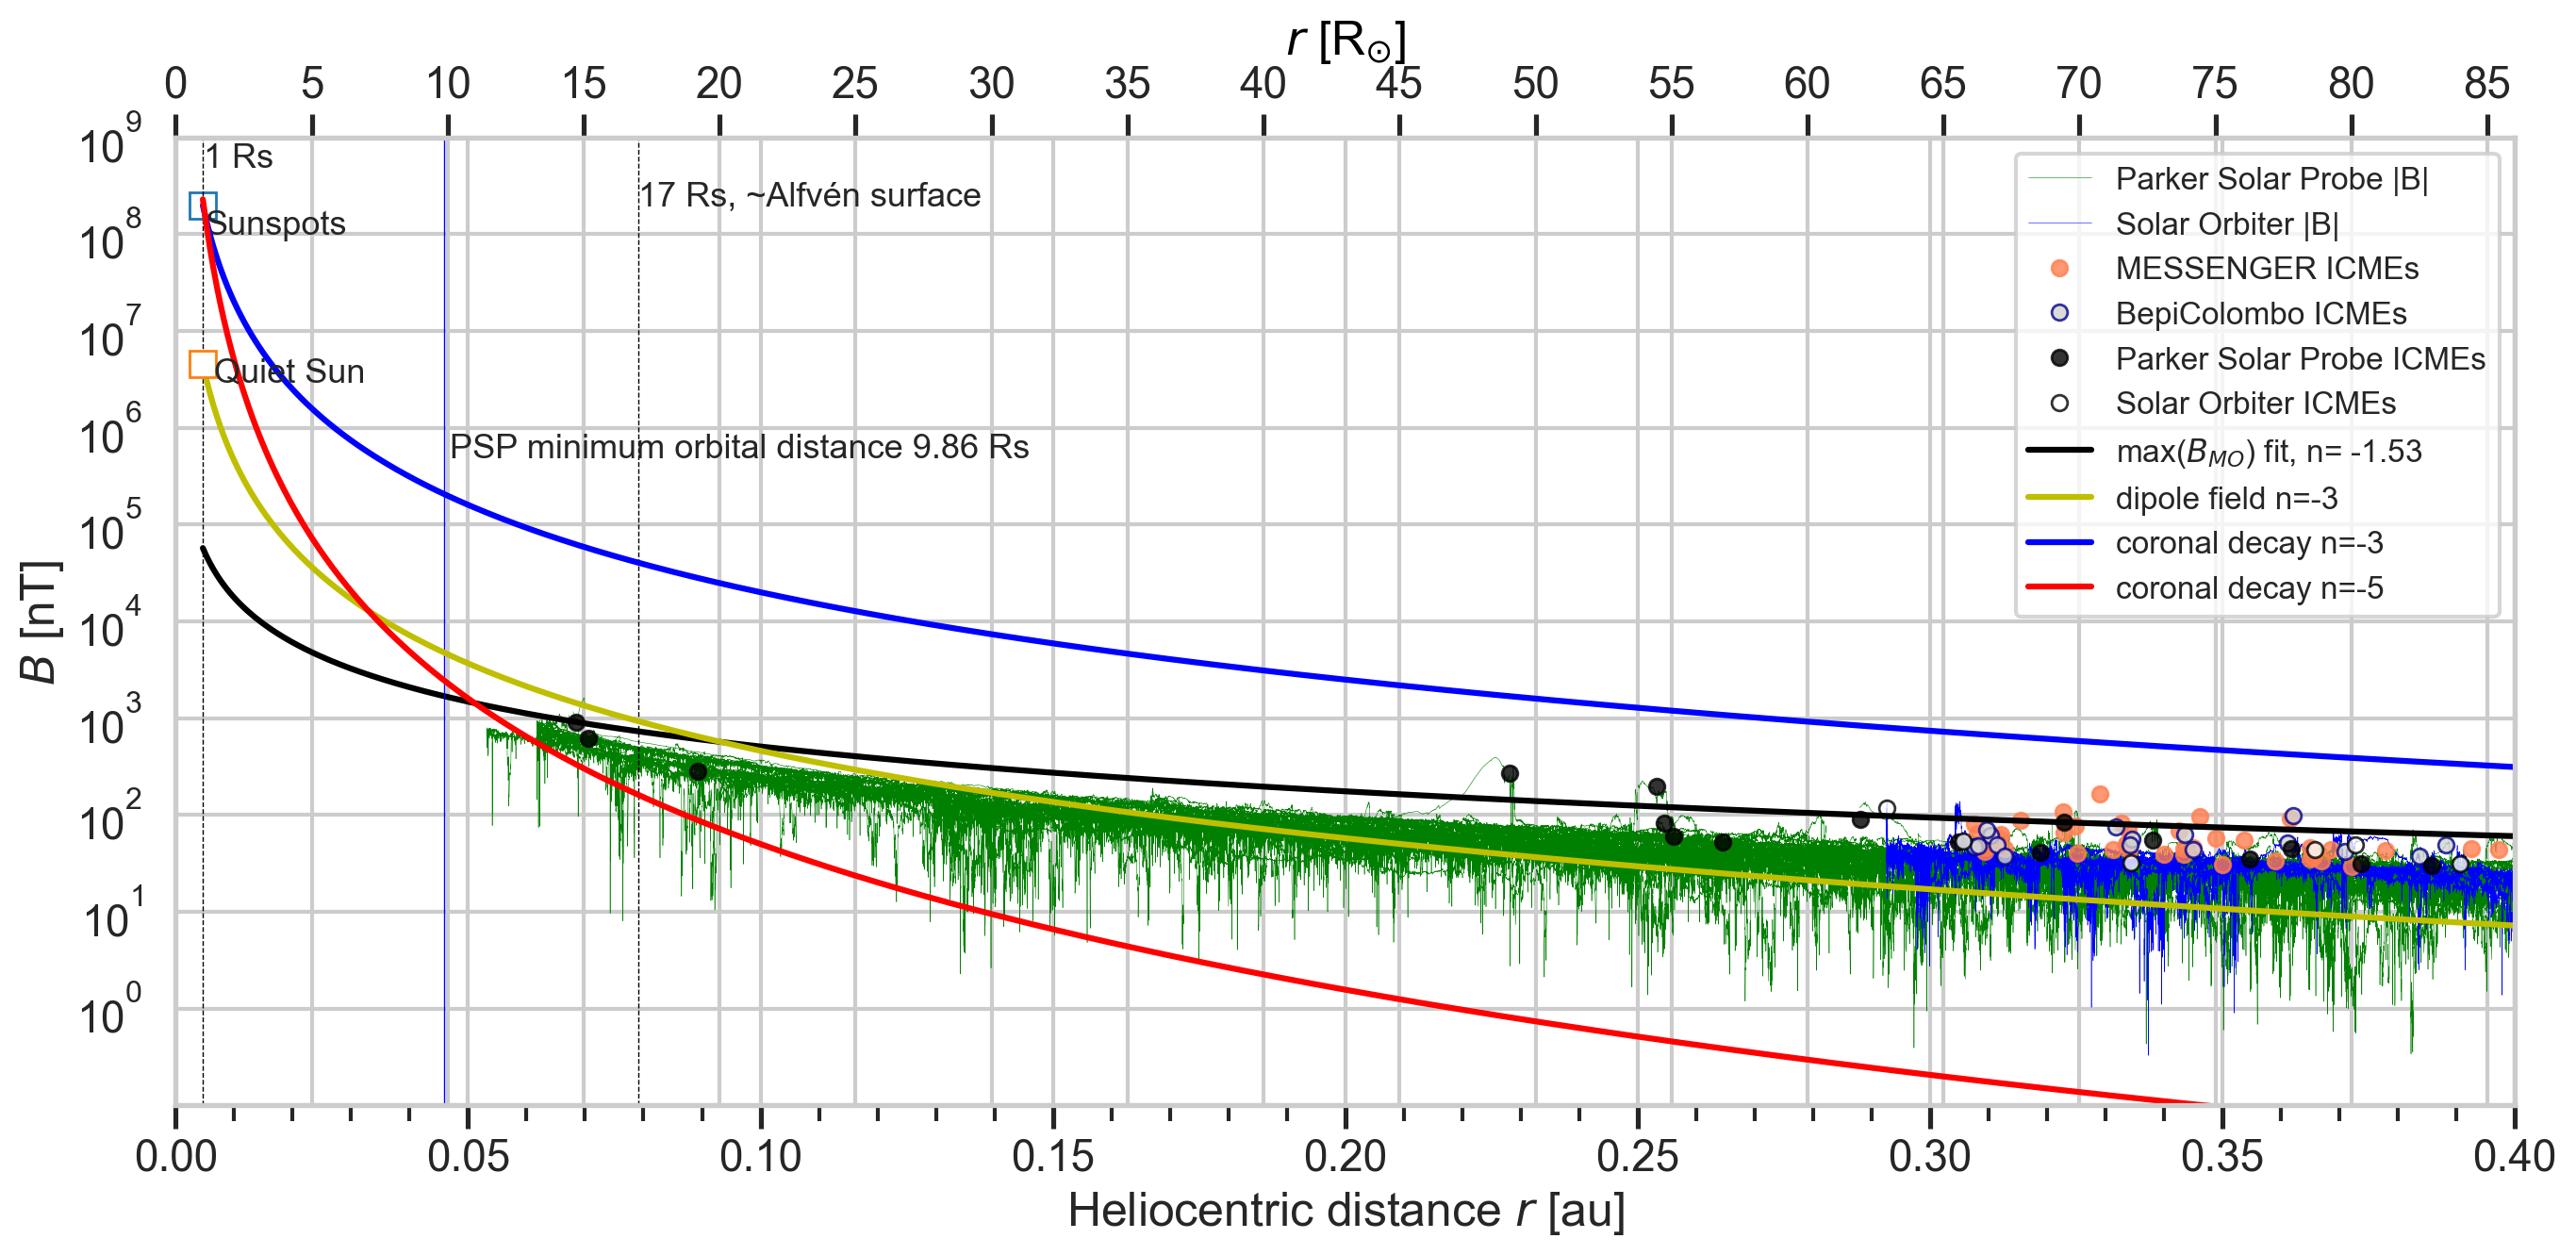

In [8]:
sns.set_context("talk")     
sns.set_style('whitegrid')

###############################################################################
fig=plt.figure(figsize=(14,7),dpi=200)

ax=plt.subplot(111)
#plt.title('ICME magnetic obstacle field compared to solar observations of active regions')
ax.set_xlabel('Heliocentric distance $r$ [au]')
ax.set_ylabel('$B$ [nT]')

#plot psp data Btotal
ax.plot(psp.r,psp.bt,'-g',linewidth=0.2, label='Parker Solar Probe |B|')
#plot SolO data Btotal
ax.plot(solo.r,solo.bt,'-b',linewidth=0.2, label='Solar Orbiter |B|')

ax.plot(ic.mo_sc_heliodistance[imes],ic.mo_bmean[imes],'o',c='coral', alpha=al,ms=ms,label='MESSENGER ICMEs')
ax.plot(ic.mo_sc_heliodistance[ibep],ic.mo_bmean[ibep],'o',c='darkblue',markerfacecolor='lightgrey', alpha=al,ms=ms,label='BepiColombo ICMEs')
ax.plot(ic.mo_sc_heliodistance[ipsp],ic.mo_bmean[ipsp],'o',c='black', alpha=al,ms=ms, label='Parker Solar Probe ICMEs')
ax.plot(ic.mo_sc_heliodistance[isol],ic.mo_bmean[isol],'o',c='black', markerfacecolor='white',alpha=al,ms=ms, label='Solar Orbiter ICMEs')

#ax3.set_xscale('log')
ax.set_xticks(np.arange(0,0.5,0.05))
ax_max_x=0.4
ax.set_xlim([0,ax_max_x])

ax.set_yscale('log')
ax.set_yticks([1,10,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9])
ax.set_ylim([0.1,10**9])

ax.grid(True, which='both', zorder=2)

######################## Create a second x-axis with solar radii

ax1 = ax.twiny()
ax1.set_xlabel('$r$ [R$_{\odot}$]', color='black')

#plot something in the solar radii scale but do not show it
ax1.plot(ic.mo_sc_heliodistance[ista]*scale, ic.mo_bmean[ista], '.',color=None)
ax1_ticks=np.arange(0,ax_max_x*scale,5)
ax1.set_xlim(0,ax_max_x*scale)
ax1.set_xticks(ax1_ticks)


#a 2nd axis grid is always in front of the data, for fix see bottom of https://github.com/matplotlib/matplotlib/issues/7984
ax1.set_zorder(-1)
ax.patch.set_visible(False)
ax1.patch.set_visible(True)

######################## plot fits

#param2 is the bmax fit
ax.plot(fitx,powerlaw(fitx,param2[0],param2[1]),'-k',label='max($B_{MO}$) fit, n= -1.53')
print(param2)
#with errors 3 std
#ax3.plot(fitx,powerlaw(fitx,param[0]-3*perr[0],fit_lm[0][1])-3*perr[0],'--k',alpha=0.5)
#ax3.plot(fitx,powerlaw(fitx,param[0]+3*perr[0],fit_lm[0][1])+3*perr[0],'--k',alpha=0.5)


########################## add solar data points

gauss=1e5 #1 Gauss= 10^5 nT

#sunspot field strength at 1 solar radii
#https://link.springer.com/article/10.1007/s11207-006-0265-4
#average 2000 Gauss

sunspot_dist=const.R_sun/const.au #1 Rs correct
sunspot_b=2000*gauss              #general value for ARs fine?

### add coronal magnetic field
#https://iopscience.iop.org/article/10.3847/2041-8213/ac0c84/pdf
coronal_dist=1.3*const.R_sun/const.au  
coronal_b=50*gauss             


ax.plot(sunspot_dist,sunspot_b,marker='s', markerfacecolor='white',markersize='10')
#ax.plot(coronal_dist,coronal_b,marker='s', markerfacecolor='white',markersize='10')



#quiet sun 46 Gauss
#https://iopscience.iop.org/article/10.3847/2041-8213/ac0af2#:~:text=On%20average%2C%20the%20quiet%2DSun,a%20strength%20of%2046%20G.

quiet_dist1=1*rs   #1 Rs correct
quiet_b1=46*gauss              
ax.errorbar(quiet_dist1,quiet_b1,yerr=0,marker='s', markerfacecolor='white',markersize='10',capsize=5)


#ax3.set_ylim([1,10**9])

#vertical lines
ax.axvline(rs,linestyle='--', color='k', linewidth=0.5)
#ax.axvline(3*rs,linestyle='--', color='k', linewidth=0.5)
ax.axvline(17*rs,linestyle='--', color='k', linewidth=0.5)

#PSP minimum orbit
psp_min=9.86*const.R_sun/const.au
ax.axvline(psp_min,linestyle='-', color='b', linewidth=0.5)


formulastring='$B_{MO}(r)='+str(np.round(param[0],2))+'r ^{'+str(np.round(param[1],2))+'}$'
#ax3.annotate(formulastring,xy=(0.4,0.6),xycoords='axes fraction',fontsize=20,ha='center')


#ax3.set_ylim([0,np.max(ic.mo_bmean)+50])
#ax3.set_yticks(np.arange(0,1000,10))
#ax3.set_ylim([0,1000])

#ax3.tick_params(axis="y", labelsize=12)

################################



print()
print()

print('value of power law at 1 Rs from in situ')

print('predicted field by MO power law at 1 Rs',np.round(powerlaw(rs,param[0],param[1])/gauss,2), ' Gauss')
print('sunspot field:', sunspot_b/gauss, 'Gauss ')

print()
print('predicted field by MO power law at 1.3 Rs',np.round(powerlaw(1.3*rs,param[0],param[1])/gauss,2), ' Gauss')
print('coronal loop field:', coronal_b/gauss, 'Gauss ')
print()



################## fit with all events < 0.35 AU? or just the two solar data points

print('B(r) < 0.3 for MO bmax')

r=ic.mo_sc_heliodistance
b=ic.mo_bmax

#remove events where one or both are nan
rem=np.where(np.logical_or(np.isnan(r), np.isnan(b)))[0]

r=r.drop(rem)
b=b.drop(rem)

rn=r.to_numpy()
bn=b.to_numpy()

#now drop all events with > 0.35
rem2=np.where(r < 0.2)[0]

r=rn[rem2]
b=bn[rem2]


################ make power law only with 2 data points, add more data points, compare to quiet Sun
#r=[sunspot_dist.value, coronal_dist.value]
#b=[sunspot_b, coronal_b]

#this fit results in a power with decay -9 and does not work at all

#fitx2=np.linspace(rs,0.03,num=100)

#fit5_lm=scipy.optimize.curve_fit(powerlaw, r,b,method='lm',full_output=True)
#fit5_trf=scipy.optimize.curve_fit(powerlaw, r,b,method='trf')
#fit5_dogbox=scipy.optimize.curve_fit(powerlaw, r,b,method='dogbox')

#print('LM; TRF; dogbox methods')
#print(fit5_trf[0])
#print(fit5_lm[0])
#print(fit5_dogbox[0])

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# discussion of variance for MO Bmax
#param5=fit5_dogbox[0]
#pcov5=fit5_dogbox[1]
#perr5 = np.sqrt(np.diag(pcov5))
#print('fit results in detail')
#print('Parameters a and b, y = a x^b:',np.round(param5,8))
#print('3 standard deviation on a and b', 3*np.round(perr5,2))
#print()
#print()

#print('ICME power law fails to connect to Sun')

#ax2=plt.subplot(212)
#ax2.plot(r,b,'ok', markersize=1)
#ax2.set_yscale('log')
#ax2.set_xlim(0,3)

#ax.plot(fitx2,powerlaw(fitx2,param5[0],param5[1]),'-b',label='power law close to the Sun, exponent -9.8')

#---------------------------------------------------------------


############## plot annotations

annotfs=13

ax.annotate('PSP minimum orbital distance 9.86 Rs',xy=(psp_min+0.001,5*1e5),xycoords='data',fontsize=annotfs,ha='left')
#ax.annotate('3 Rs',xy=(0.015,3*1e4),xycoords='data',fontsize=annotfs,ha='left')
ax.annotate('1 Rs',xy=(0.0048,5*1e8),xycoords='data',fontsize=annotfs,ha='left')
ax.annotate('17 Rs, ~Alfvén surface',xy=(17*rs,2*1e8),xycoords='data',fontsize=annotfs,ha='left')
ax.annotate('Sunspots',xy=(0.005,1e8),xycoords='data',fontsize=annotfs,ha='left',zorder=2)
#ax.annotate('Coronal loops',xy=(0.0065,3*1e6),xycoords='data',fontsize=annotfs,ha='left')
ax.annotate('Quiet Sun',xy=(0.0065,3*1e6),xycoords='data',fontsize=annotfs,ha='left')




#start from quiet Sun
n3=-3
const_quiet1=0.46
ax.plot(fitx,powerlaw(fitx,const_quiet1,n3),'-y',label='dipole field n=-3')


#active region with n-3
const2=20
ax.plot(fitx,powerlaw(fitx,const2,n3),'-b',label='coronal decay n=-3')

#active region with n-5
n5=-5
const3=5*1e-4
ax.plot(fitx,powerlaw(fitx,const3,n5),'-r',label='coronal decay n=-5')


ax.legend(fontsize=12,facecolor='white')

ax.xaxis.set_minor_locator(MultipleLocator(0.01))
ax.tick_params(which="both", bottom=True)
#ax.set_minor_grid('off')
ax.grid(False, which='minor')

# Setting 


plt.tight_layout()
plt.savefig('../results/moestl_2024_icmecat/fig5_br_mo_zoom.png', dpi=150,bbox_inches='tight')
plt.savefig('../results/moestl_2024_icmecat/fig5_br_mo_zoom.pdf', dpi=150,bbox_inches='tight')

#### same with zoom in on close-in solar distances, for trying out power laws



value of power law at 1 Rs from in situ
predicted field by MO power law at 1 Rs 0.51  Gauss
sunspot field: 2000.0 Gauss 

predicted field by MO power law at 1.3 Rs 0.34  Gauss
coronal loop field: 50.0 Gauss 

695.6999999999999


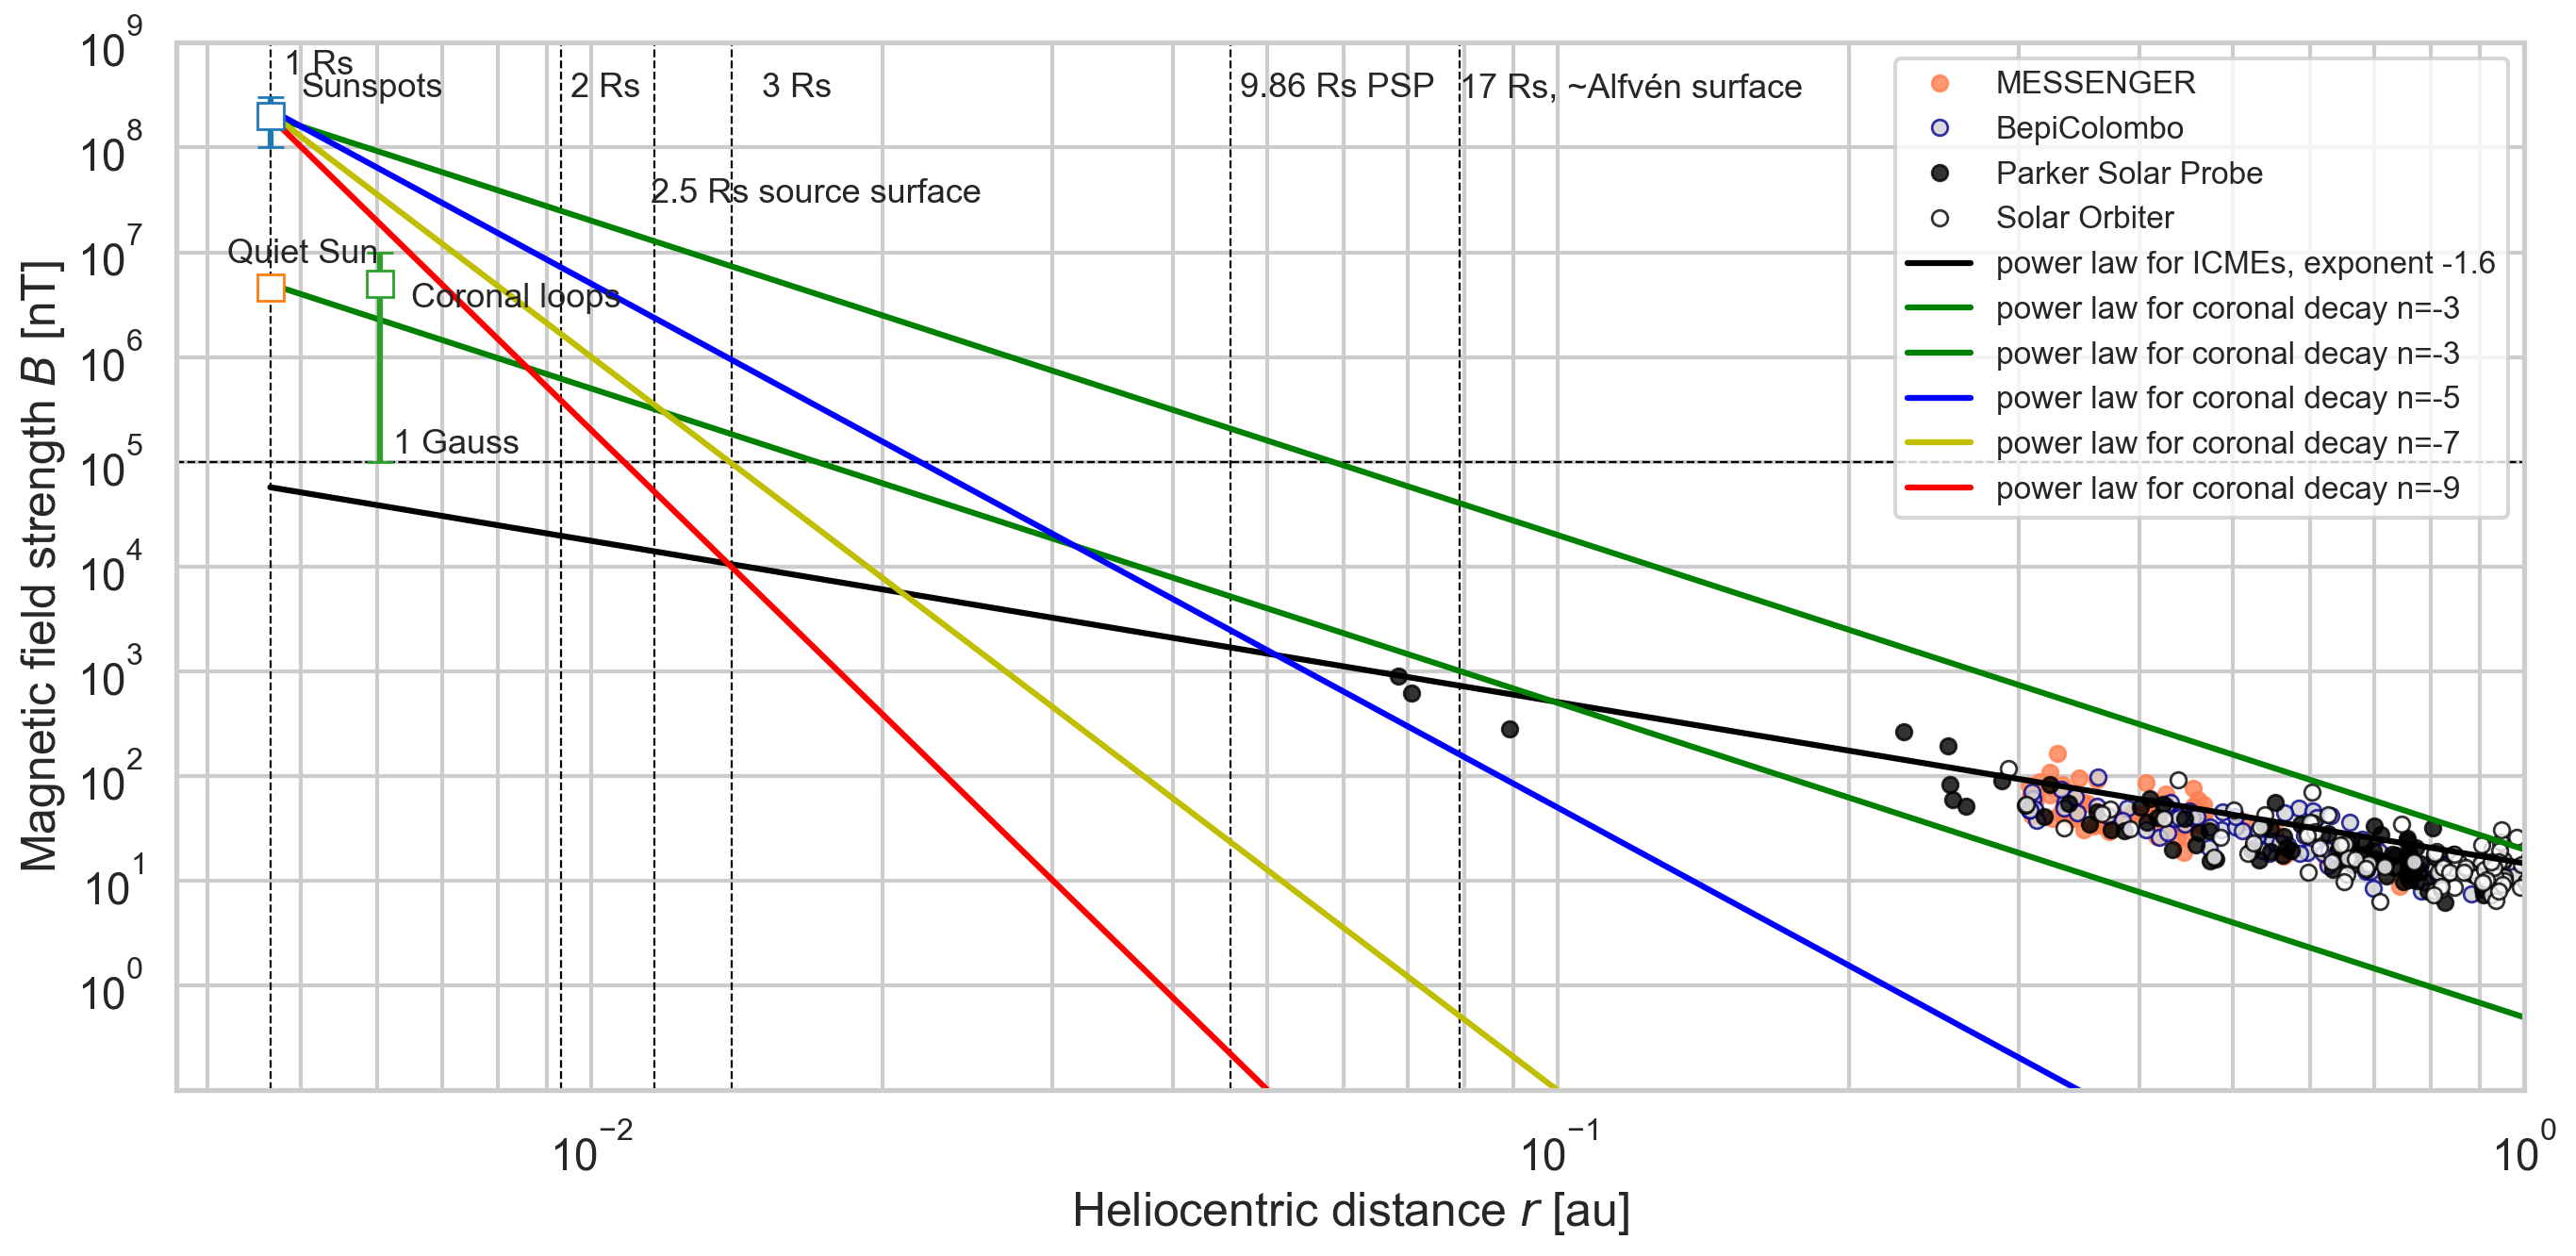

In [9]:
sns.set_context("talk")     
sns.set_style('whitegrid')

fig=plt.figure(figsize=(14,7),dpi=200)

ax=plt.subplot(111)
#plt.title('ICME magnetic obstacle field compared to solar observations of active regions')
ax.set_xlabel('Heliocentric distance $r$ [au]')
ax.set_ylabel('Magnetic field strength $B$ [nT]')


#plot psp data Btotal
#ax.plot(psp.r,psp.bt,'-g',linewidth=0.2, label='PSP Btot')
#plot SolO data Btotal
#ax.plot(solo.r,solo.bt,'-b',linewidth=0.2, label='SolO Btot')

ax.plot(ic.mo_sc_heliodistance[imes],ic.mo_bmean[imes],'o',c='coral', alpha=al,ms=ms,label='MESSENGER')
ax.plot(ic.mo_sc_heliodistance[ibep],ic.mo_bmean[ibep],'o',c='darkblue',markerfacecolor='lightgrey', alpha=al,ms=ms,label='BepiColombo')
ax.plot(ic.mo_sc_heliodistance[ipsp],ic.mo_bmean[ipsp],'o',c='black', alpha=al,ms=ms, label='Parker Solar Probe')
ax.plot(ic.mo_sc_heliodistance[isol],ic.mo_bmean[isol],'o',c='black', markerfacecolor='white',alpha=al,ms=ms, label='Solar Orbiter')


#x in AU
ax.set_xscale('log')
ax_min_x=rs*0.8
ax_max_x=1
ax.set_xlim([ax_min_x,ax_max_x])
#ax.set_xticks([1,2,3,4,5,6,10,20,30])


ax.set_yscale('log')
ax.set_yticks([1,10,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9])
ax.set_ylim([0.1,10**9])

ax.grid(True, which='both', zorder=2)


######################## plot fits

#param2 is the ICME bmax fit

ax.plot(fitx,powerlaw(fitx,param2[0],param2[1]),'-k',label='power law for ICMEs, exponent -1.6')
#with errors 3 std
#ax3.plot(fitx,powerlaw(fitx,param[0]-3*perr[0],fit_lm[0][1])-3*perr[0],'--k',alpha=0.5)
#ax3.plot(fitx,powerlaw(fitx,param[0]+3*perr[0],fit_lm[0][1])+3*perr[0],'--k',alpha=0.5)



#ax3.set_ylim([1,10**9])

#vertical lines
ax.axvline(1*rs,linestyle='--', color='k', linewidth=0.8)
ax.axvline(2*rs,linestyle='--', color='k', linewidth=0.8)
ax.axvline(2.5*rs,linestyle='--', color='k', linewidth=0.8)
ax.axvline(3*rs,linestyle='--', color='k', linewidth=0.8)
ax.axvline(17*rs,linestyle='--', color='k', linewidth=0.8)


ax.axhline(1e5,linestyle='--', color='k', linewidth=0.8)

#PSP minimum orbit
psp_min=9.86*const.R_sun/const.au
ax.axvline(psp_min,linestyle='--', color='k', linewidth=0.8)


formulastring='$B_{MO}(r)='+str(np.round(param[0],2))+'r ^{'+str(np.round(param[1],2))+'}$'
#ax3.annotate(formulastring,xy=(0.4,0.6),xycoords='axes fraction',fontsize=20,ha='center')


#ax3.set_ylim([0,np.max(ic.mo_bmean)+50])
#ax3.set_yticks(np.arange(0,1000,10))
#ax3.set_ylim([0,1000])

#ax3.tick_params(axis="y", labelsize=12)

################################



print()
print()

print('value of power law at 1 Rs from in situ')

print('predicted field by MO power law at 1 Rs',np.round(powerlaw(rs,param[0],param[1])/gauss,2), ' Gauss')
print('sunspot field:', sunspot_b/gauss, 'Gauss ')

print()
print('predicted field by MO power law at 1.3 Rs',np.round(powerlaw(1.3*rs,param[0],param[1])/gauss,2), ' Gauss')
print('coronal loop field:', coronal_b/gauss, 'Gauss ')
print()



############## plot annotations

annotfs=13

ax.annotate('9.86 Rs PSP',xy=(psp_min+0.001,3*1e8),xycoords='data',fontsize=annotfs,ha='left')
ax.annotate('3 Rs',xy=(0.015,3*1e8),xycoords='data',fontsize=annotfs,ha='left')
ax.annotate('2.5 Rs source surface',xy=(0.0115,3*1e7),xycoords='data',fontsize=annotfs,ha='left')
ax.annotate('2 Rs',xy=(0.0095,3*1e8),xycoords='data',fontsize=annotfs,ha='left')
ax.annotate('1 Rs',xy=(0.0048,5*1e8),xycoords='data',fontsize=annotfs,ha='left')
ax.annotate('17 Rs, ~Alfvén surface',xy=(17*rs,3*1e8),xycoords='data',fontsize=annotfs,ha='left')

ax.annotate('Sunspots',xy=(0.005,3*1e8),xycoords='data',fontsize=annotfs,ha='left',zorder=5)
ax.annotate('Coronal loops',xy=(0.0065,3*1e6),xycoords='data',fontsize=annotfs,ha='left',zorder=5)

ax.annotate('Quiet Sun',xy=(0.0042,80*gauss),xycoords='data',fontsize=annotfs,ha='left',zorder=5)


ax.annotate('1 Gauss',xy=(1.3*0.0048,1.2*1e5),xycoords='data',fontsize=annotfs,ha='left')



#try out powerlaw from 1 Rs with -1, -2, -3 decay index n

n1=-1
n2=-2

#start from quiet Sun
n3=-3
const_quiet1=0.5
ax.plot(fitx,powerlaw(fitx,const_quiet1,n3),'-g',label='power law for coronal decay n=-3')


#active region sunspots
const1=2*1e1
ax.plot(fitx,powerlaw(fitx,const1,n3),'-g',label='power law for coronal decay n=-3')

n5=-5
const2=5*1e-4
ax.plot(fitx,powerlaw(fitx,const2,n5),'-b',label='power law for coronal decay n=-5')

n7=-7
const2=1e-8
ax.plot(fitx,powerlaw(fitx,const2,n7),'-y',label='power law for coronal decay n=-7')

n9=-9
const2=2*1e-13
ax.plot(fitx,powerlaw(fitx,const2,n9),'-r',label='power law for coronal decay n=-9')



ax.legend(fontsize=12,facecolor='white')



########################## add solar data points

gauss=1e5 #1 Gauss= 10^5 nT


#sunspot field strength at 1 solar radii
#https://link.springer.com/article/10.1007/s11207-006-0265-4
#average 2000 Gauss
sunspot_dist1=1*rs   #1 Rs correct
sunspot_b1=2000*gauss              
#range 1000 - 3000 gauss
ax.errorbar(sunspot_dist1,sunspot_b1,yerr=1e3*gauss,marker='s', markerfacecolor='white',markersize='10',capsize=5)



#quiet sun 46 Gauss
#https://iopscience.iop.org/article/10.3847/2041-8213/ac0af2#:~:text=On%20average%2C%20the%20quiet%2DSun,a%20strength%20of%2046%20G.

quiet_dist1=1*rs   #1 Rs correct
quiet_b1=46*gauss              
ax.errorbar(quiet_dist1,quiet_b1,yerr=0,marker='s', markerfacecolor='white',markersize='10',capsize=5)



### add coronal magnetic field
#https://iopscience.iop.org/article/10.3847/2041-8213/ac0c84/pdf
coronal_dist1=1.3*rs 
coronal_b1=50*gauss  
#range 1-100 gauss



ax.errorbar(coronal_dist1,coronal_b1,yerr=49*gauss,marker='s', markerfacecolor='white',markersize='10',capsize=5)





#https://iopscience.iop.org/article/10.3847/1538-4357/ac5b06
#height model 50 Mm
rs_in_Mm=const.R_sun.value*1e-6
print(rs_in_Mm)

plt.tight_layout()
plt.savefig('../results/moestl_2024_icmecat/fig5_br_mo_zoom_close.png', dpi=150,bbox_inches='tight')

#### B(r) curve fits in full ICME

B(r) for ICME Bmean
LM; TRF; dogbox methods
[ 9.93246683 -1.61608287]
[ 9.93246739 -1.61608285]
[ 9.93246389 -1.61608301]
LM results in detail
Parameters a and b, y = a x^b: [ 9.93 -1.62]
3 standard deviation on a and b [0.6  0.03]




-----------------------------
B(r) for ICME_Bmax
LM; TRF; dogbox methods
[15.14582955 -1.6024918 ]
[15.14591119 -1.60248917]
[15.14591909 -1.60248892]
LM results in detail
Parameters a and b, y = a x^b: [15.15 -1.6 ]
3 standard deviation on a and b [1.29 0.03]




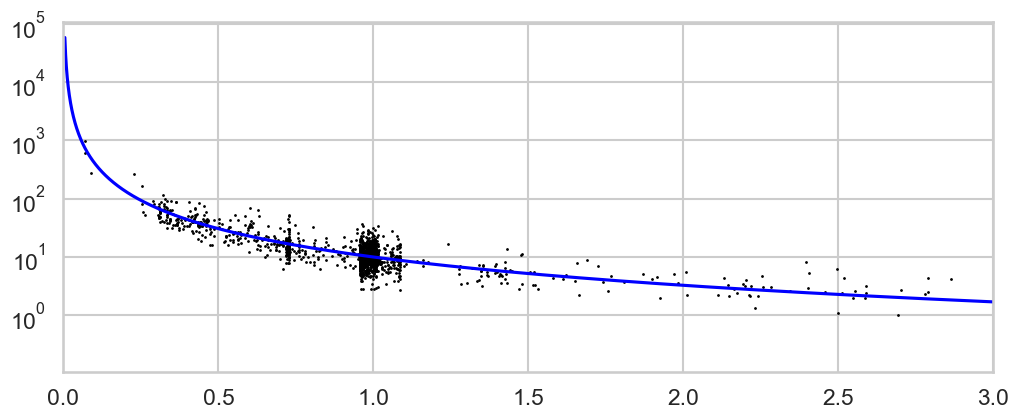

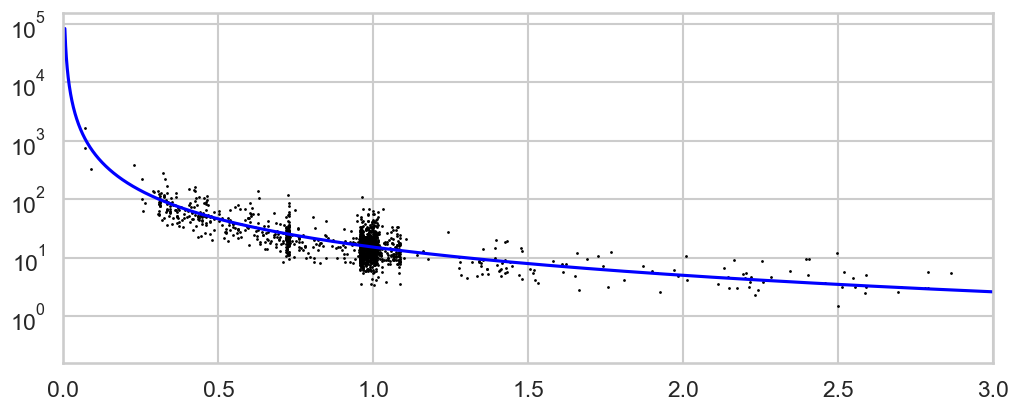

In [10]:
print('B(r) for ICME Bmean')

r=ic.mo_sc_heliodistance
b=ic.icme_bmean

#remove events where one or both are nan
rem=np.where(np.logical_or(np.isnan(r), np.isnan(b)))[0]

r=r.drop(rem)
b=b.drop(rem)

fit3_lm=scipy.optimize.curve_fit(powerlaw, r,b,method='lm',full_output=True)
fit3_trf=scipy.optimize.curve_fit(powerlaw, r,b,method='trf')
fit3_dogbox=scipy.optimize.curve_fit(powerlaw, r,b,method='dogbox')

print('LM; TRF; dogbox methods')
print(fit3_trf[0])
print(fit3_lm[0])
print(fit3_dogbox[0])

param3=fit3_lm[0]
pcov3=fit3_lm[1]
perr3 = np.sqrt(np.diag(pcov3))
print('LM results in detail')
print('Parameters a and b, y = a x^b:',np.round(param3,2))
print('3 standard deviation on a and b', 3*np.round(perr3,2))
print()
print()
#---------------------------------------------------------------

fig=plt.figure(3,figsize=(12,10),dpi=100)
ax=plt.subplot(211)
ax.plot(r,b,'ok', markersize=1)
ax.set_yscale('log')
ax.set_xlim(0,3)
ax.plot(fitx,powerlaw(fitx,param3[0],param3[1]),'-b')


        

print()
print()
print('-----------------------------')

###########################################################################
print('B(r) for ICME_Bmax')

r=ic.mo_sc_heliodistance
b=ic.icme_bmax

#remove events where one or both are nan
rem=np.where(np.logical_or(np.isnan(r), np.isnan(b)))[0]

r=r.drop(rem)
b=b.drop(rem)
fit4_lm=scipy.optimize.curve_fit(powerlaw, r,b,method='lm',full_output=True)
fit4_trf=scipy.optimize.curve_fit(powerlaw, r,b,method='trf')
fit4_dogbox=scipy.optimize.curve_fit(powerlaw, r,b,method='dogbox')

print('LM; TRF; dogbox methods')
print(fit4_trf[0])
print(fit4_lm[0])
print(fit4_dogbox[0])

param4=fit4_lm[0]
pcov4=fit4_lm[1]
perr4 = np.sqrt(np.diag(pcov4))
print('LM results in detail')
print('Parameters a and b, y = a x^b:',np.round(param4,2))
print('3 standard deviation on a and b', 3*np.round(perr4,2))
print()
print()

fig=plt.figure(6,figsize=(12,10),dpi=100)
ax=plt.subplot(211)
ax.plot(r,b,'ok', markersize=1)
ax.set_yscale('log')
ax.set_xlim(0,3)
ax.plot(fitx,powerlaw(fitx,param4[0],param4[1]),'-b')

#all results , e.g. nfev indicates the number of function calls
#print(fit2_lm)



### Duration D(r) fits



D(r)
LM; TRF; dogbox methods
[21.82724767  0.57411634]
[21.82724721  0.57411637]
[21.82722742  0.5741175 ]


LM results in detail
Parameters a and b, y = a x^b: [21.83  0.57]
3 standard deviation on a and b [1.35 0.06]




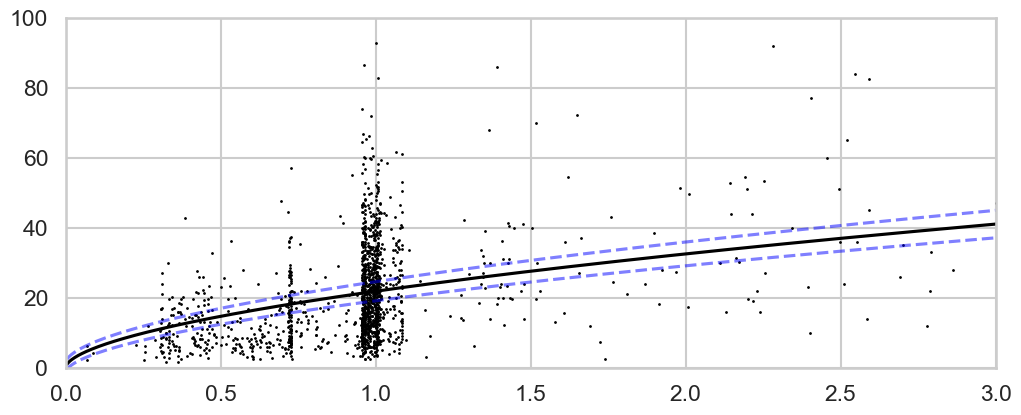

In [11]:
print('D(r)')

r=ic.mo_sc_heliodistance
d=ic.mo_duration

#remove events where one or both are nan
rem=np.where(np.logical_or(np.isnan(r), np.isnan(d)))[0]

r=r.drop(rem)
d=d.drop(rem)

fitx=np.linspace(rs,3,num=1000)

#curve fit, no initial guess

fit_lm=scipy.optimize.curve_fit(powerlaw, r,d,method='lm',full_output=True)
fit_trf=scipy.optimize.curve_fit(powerlaw, r,d,method='trf')
fit_dogbox=scipy.optimize.curve_fit(powerlaw, r,d,method='dogbox')

print('LM; TRF; dogbox methods')
print(fit_lm[0])
print(fit_trf[0])
print(fit_dogbox[0])

print()
print()

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# discussion of variance for MO Bmean
param=fit_lm[0]
pcov=fit_lm[1]
perr = np.sqrt(np.diag(pcov))
print('LM results in detail')
print('Parameters a and b, y = a x^b:',np.round(param,2))
print('3 standard deviation on a and b', 3*np.round(perr,2))
print()
print()


#---------------------------------------------------------------


fig=plt.figure(5,figsize=(12,10),dpi=100)
ax=plt.subplot(211)
ax.plot(r,d,'ok', markersize=1)
ax.set_xlim(0,3)
ax.set_ylim(0,100)

#ax.set_xlim(0,0.2)
#ax.set_ylim(0,10)


ax.plot(fitx,powerlaw(fitx,fit_lm[0][0],fit_lm[0][1]),'-k')
#with errors 3 std
ax.plot(fitx,powerlaw(fitx,param[0]-3*perr[0],fit_lm[0][1])-3*perr[0],'--b',alpha=0.5)
ax.plot(fitx,powerlaw(fitx,param[0]+3*perr[0],fit_lm[0][1])+3*perr[0],'--b',alpha=0.5)



## General ICME statistics

In [16]:
ic.keys()

Index(['icmecat_id', 'sc_insitu', 'icme_start_time', 'mo_start_time',
       'mo_end_time', 'mo_sc_heliodistance', 'mo_sc_long_heeq',
       'mo_sc_lat_heeq', 'icme_duration', 'icme_bmax', 'icme_bmean',
       'icme_bstd', 'icme_speed_mean', 'icme_speed_std', 'mo_duration',
       'mo_bmax', 'mo_bmean', 'mo_bstd', 'mo_bzmean', 'mo_bzmin', 'mo_bzstd',
       'mo_bymean', 'mo_bystd', 'mo_speed_mean', 'mo_speed_std',
       'mo_expansion_speed', 'mo_pdyn_mean', 'mo_pdyn_std', 'mo_density_mean',
       'mo_density_std', 'mo_temperature_mean', 'mo_temperature_std',
       'sheath_speed_mean', 'sheath_speed_std', 'sheath_density_mean',
       'sheath_density_std', 'sheath_pdyn_mean', 'sheath_pdyn_std'],
      dtype='object')

466.1397260273973
19.544109589041096
984.3
283.5


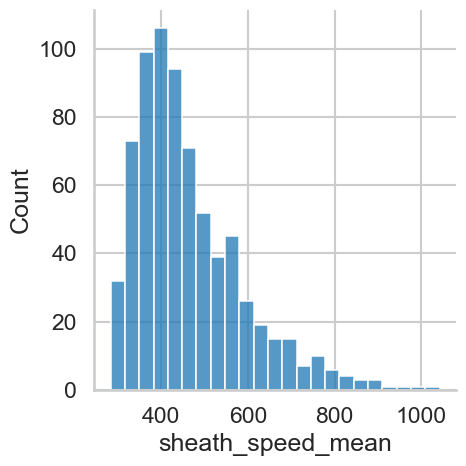

In [38]:
print(np.nanmean(ic.sheath_speed_mean[iwin]))
print(np.nanmean(ic.sheath_speed_std[iwin]))
print(np.nanmax(ic.sheath_speed_mean[iwin]))
print(np.nanmin(ic.sheath_speed_mean[iwin]))
sns.displot(ic.sheath_speed_mean)

In [39]:
au=const.au.value*1e-3

In [47]:
#lead time for every 0.01 au with mean sheath speed
print(au/466/60/100)

#lead time for every 0.01 au with mean sheath speed

print(au/500/60/100)

print(au/800/60/100)


print(au/2000/60/100)



53.504245600858376
49.86595690000001
31.166223062500002
12.466489225000002
